<a href="https://colab.research.google.com/github/MansurPro/walmart_dataset/blob/main/walmart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import data (Mansurbek)

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

data_set_url = "https://raw.githubusercontent.com/MansurPro/walmart_dataset/main/Walmart.csv"
data = pd.read_csv(data_set_url)

In [279]:
import warnings
warnings.filterwarnings('ignore')

In [280]:
# Data review (5 rows)
data.head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31        2.57   
1      1  12-02-2010    1641957.44             1        38.51        2.55   
2      1  19-02-2010    1611968.17             0        39.93        2.51   
3      1  26-02-2010    1409727.59             0        46.63        2.56   
4      1  05-03-2010    1554806.68             0        46.50        2.62   

     CPI  Unemployment  
0 211.10          8.11  
1 211.24          8.11  
2 211.29          8.11  
3 211.32          8.11  
4 211.35          8.11

* Store - the store number
* Date - the week of sales
* Weekly_Sales - sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events -> <br /> Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13<br /> Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br /> Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br /> Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [281]:
print('\n\033[1mInference:\033[0m The Datset consists of {} features (columns) & {} samples (rows).'.format(data.shape[1], data.shape[0]))


Inference: The Datset consists of 8 features (columns) & 6435 samples (rows).


In [282]:
pd.options.display.float_format = '{:.2f}'.format

* Used to set the display format for floating-point numbers when pandas prints them to the console.
* :.2f specifies that floating-point numbers should be formatted with two digits after the decimal point.

In [283]:
# Checking the dtypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


- Not all of data is integer or float (numbers), there is one Date Object, let's convert it to numbers

In [284]:
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price     CPI  \
count 6435.00       6435.00       6435.00      6435.00     6435.00 6435.00   
mean    23.00    1046964.88          0.07        60.66        3.36  171.58   
std     12.99     564366.62          0.26        18.44        0.46   39.36   
min      1.00     209986.25          0.00        -2.06        2.47  126.06   
25%     12.00     553350.10          0.00        47.46        2.93  131.74   
50%     23.00     960746.04          0.00        62.67        3.44  182.62   
75%     34.00    1420158.66          0.00        74.94        3.73  212.74   
max     45.00    3818686.45          1.00       100.14        4.47  227.23   

       Unemployment  
count       6435.00  
mean           8.00  
std            1.88  
min            3.88  
25%            6.89  
50%            7.87  
75%            8.62  
max           14.31

In [285]:
data.columns = data.columns.str.lower()

* Lower case column names

In [286]:
data.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

## ChecKing Missing Values (Nicolas)

In [287]:
data.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

* Having no missing values is beneficial for data analysis and modeling

## Checking Duplicates Values

In [288]:
data.duplicated().sum()

0

* Sum is 0, meaning there are no duplicate rows in the DataFrame.

## Data Prepocessing

In [289]:
# Checking the dtypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## Checking Missing Values (Nicolas)


In [290]:
# dataset cleaning if there are NaN values
data.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

- No missing values (or Null), so great for further analysis

In [291]:
# Checking Duplicate Values
data.duplicated().sum()

0

* No dupllicates in data set

## Feature Engineering (Ravil)

In [292]:
## Correcting the date format
data['date'] = pd.to_datetime(data['date'], format="%d-%m-%Y")
data

store       date  weekly_sales  holiday_flag  temperature  fuel_price  \
0         1 2010-02-05    1643690.90             0        42.31        2.57   
1         1 2010-02-12    1641957.44             1        38.51        2.55   
2         1 2010-02-19    1611968.17             0        39.93        2.51   
3         1 2010-02-26    1409727.59             0        46.63        2.56   
4         1 2010-03-05    1554806.68             0        46.50        2.62   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88        4.00   
6431     45 2012-10-05     733455.07             0        64.89        3.98   
6432     45 2012-10-12     734464.36             0        54.47        4.00   
6433     45 2012-10-19     718125.53             0        56.47        3.97   
6434     45 2012-10-26     760281.43             0        58.85        3.88   

        cpi  unemployment  
0    211.10          8.11  
1    211.24          8.11  
2    211.29          8.11  
3    211.32          8.11  
4    211.35          8.11  
...     ...           ...  
6430 192.01          8.68  
6431 192.17          8.67  
6432 192.33          8.67  
6433 192.33          8.67  
6434 192.31          8.67  

[6435 rows x 8 columns]

In [293]:
def season_getter(quarter):
    quarter_to_season = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    return quarter_to_season.get(quarter, 'Invalid Quarter')

In [294]:
# Examples:
print(season_getter(1))  # Output: 'Winter'
print(season_getter(3))  # Output: 'Summer'
print(season_getter(4))
print(season_getter(2))

Winter
Summer
Fall
Spring


In [295]:
import calendar
# Use the 'assign' method to add multiple columns in a single line
data = data.assign(
    year=data['date'].dt.year, # to add a year column
    quarter=data['date'].dt.quarter,# to add a quarter column (q1, q2, q3 and q3)
    season=data['date'].dt.quarter.map(season_getter), # applied the previously defined function to get the season names
    month=data['date'].dt.month, # to add a month coumn
    month_name=data['date'].dt.month_name(), # to add a month_name column
    week=data['date'].dt.isocalendar().week,  # to add a week column
    day_of_week=data['date'].dt.day_name() # to add a day_name column
)

In [296]:
data.head(5)

store       date  weekly_sales  holiday_flag  temperature  fuel_price  \
0      1 2010-02-05    1643690.90             0        42.31        2.57   
1      1 2010-02-12    1641957.44             1        38.51        2.55   
2      1 2010-02-19    1611968.17             0        39.93        2.51   
3      1 2010-02-26    1409727.59             0        46.63        2.56   
4      1 2010-03-05    1554806.68             0        46.50        2.62   

     cpi  unemployment  year  quarter  season  month month_name  week  \
0 211.10          8.11  2010        1  Winter      2   February     5   
1 211.24          8.11  2010        1  Winter      2   February     6   
2 211.29          8.11  2010        1  Winter      2   February     7   
3 211.32          8.11  2010        1  Winter      2   February     8   
4 211.35          8.11  2010        1  Winter      3      March     9   

  day_of_week  
0      Friday  
1      Friday  
2      Friday  
3      Friday  
4      Friday

In [297]:
data.shape

(6435, 15)

In [298]:
# saving original dataset (we may manipulate dataset later)
original_data = data.copy(deep=True)

In [299]:
target = 'Weekly_Sales'
features = [i for i in data.columns if i not in [target]]
original_df = data.copy(deep=True)

data.head()

store       date  weekly_sales  holiday_flag  temperature  fuel_price  \
0      1 2010-02-05    1643690.90             0        42.31        2.57   
1      1 2010-02-12    1641957.44             1        38.51        2.55   
2      1 2010-02-19    1611968.17             0        39.93        2.51   
3      1 2010-02-26    1409727.59             0        46.63        2.56   
4      1 2010-03-05    1554806.68             0        46.50        2.62   

     cpi  unemployment  year  quarter  season  month month_name  week  \
0 211.10          8.11  2010        1  Winter      2   February     5   
1 211.24          8.11  2010        1  Winter      2   February     6   
2 211.29          8.11  2010        1  Winter      2   February     7   
3 211.32          8.11  2010        1  Winter      2   February     8   
4 211.35          8.11  2010        1  Winter      3      March     9   

  day_of_week  
0      Friday  
1      Friday  
2      Friday  
3      Friday  
4      Friday

In [300]:
# Checking number of unique rows in each feature
data.nunique().sort_values()

day_of_week        1
holiday_flag       2
year               3
quarter            4
season             4
month             12
month_name        12
store             45
week              52
date             143
unemployment     349
fuel_price       892
cpi             2145
temperature     3528
weekly_sales    6435
dtype: int64

In [301]:
# Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; # numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 7 numerical & 8 categorical features.


In [302]:
# Checking the stats of all the columns

display(data.describe())

store                 date  weekly_sales  holiday_flag  temperature  \
count 6435.00                 6435       6435.00       6435.00      6435.00   
mean    23.00  2011-06-17 00:00:00    1046964.88          0.07        60.66   
min      1.00  2010-02-05 00:00:00     209986.25          0.00        -2.06   
25%     12.00  2010-10-08 00:00:00     553350.10          0.00        47.46   
50%     23.00  2011-06-17 00:00:00     960746.04          0.00        62.67   
75%     34.00  2012-02-24 00:00:00    1420158.66          0.00        74.94   
max     45.00  2012-10-26 00:00:00    3818686.45          1.00       100.14   
std     12.99                  NaN     564366.62          0.26        18.44   

       fuel_price     cpi  unemployment    year  quarter   month    week  
count     6435.00 6435.00       6435.00 6435.00  6435.00 6435.00 6435.00  
mean         3.36  171.58          8.00 2010.97     2.48    6.45   25.82  
min          2.47  126.06          3.88 2010.00     1.00    1.00    1.00  
25%          2.93  131.74          6.89 2010.00     2.00    4.00   14.00  
50%          3.44  182.62          7.87 2011.00     2.00    6.00   26.00  
75%          3.73  212.74          8.62 2012.00     3.00    9.00   38.00  
max          4.47  227.23         14.31 2012.00     4.00   12.00   52.00  
std          0.46   39.36          1.88    0.80     1.07    3.24   14.13

In [303]:
# Descriptive Statisticals of Numerical columns
data[['weekly_sales','temperature','fuel_price','cpi','unemployment']].describe()

weekly_sales  temperature  fuel_price     cpi  unemployment
count       6435.00      6435.00     6435.00 6435.00       6435.00
mean     1046964.88        60.66        3.36  171.58          8.00
std       564366.62        18.44        0.46   39.36          1.88
min       209986.25        -2.06        2.47  126.06          3.88
25%       553350.10        47.46        2.93  131.74          6.89
50%       960746.04        62.67        3.44  182.62          7.87
75%      1420158.66        74.94        3.73  212.74          8.62
max      3818686.45       100.14        4.47  227.23         14.31

# 2. Exploratory Data Analysis (EDA) (Ravil, Mansurbek, Nicolas)




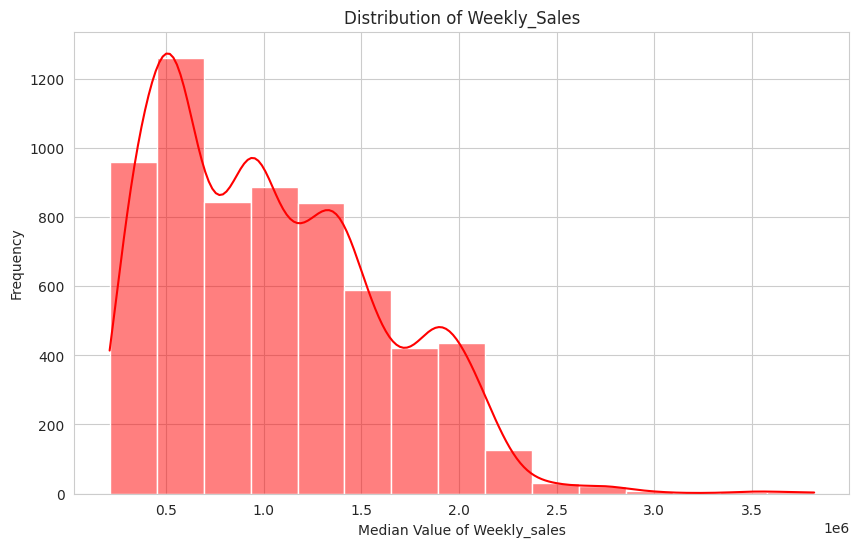

In [304]:
# Ravil
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='weekly_sales', kde=True,bins = 15, color = 'r')
plt.title('Distribution of Weekly_Sales')
plt.xlabel('Median Value of Weekly_sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Distribution analysis of key numerical features.

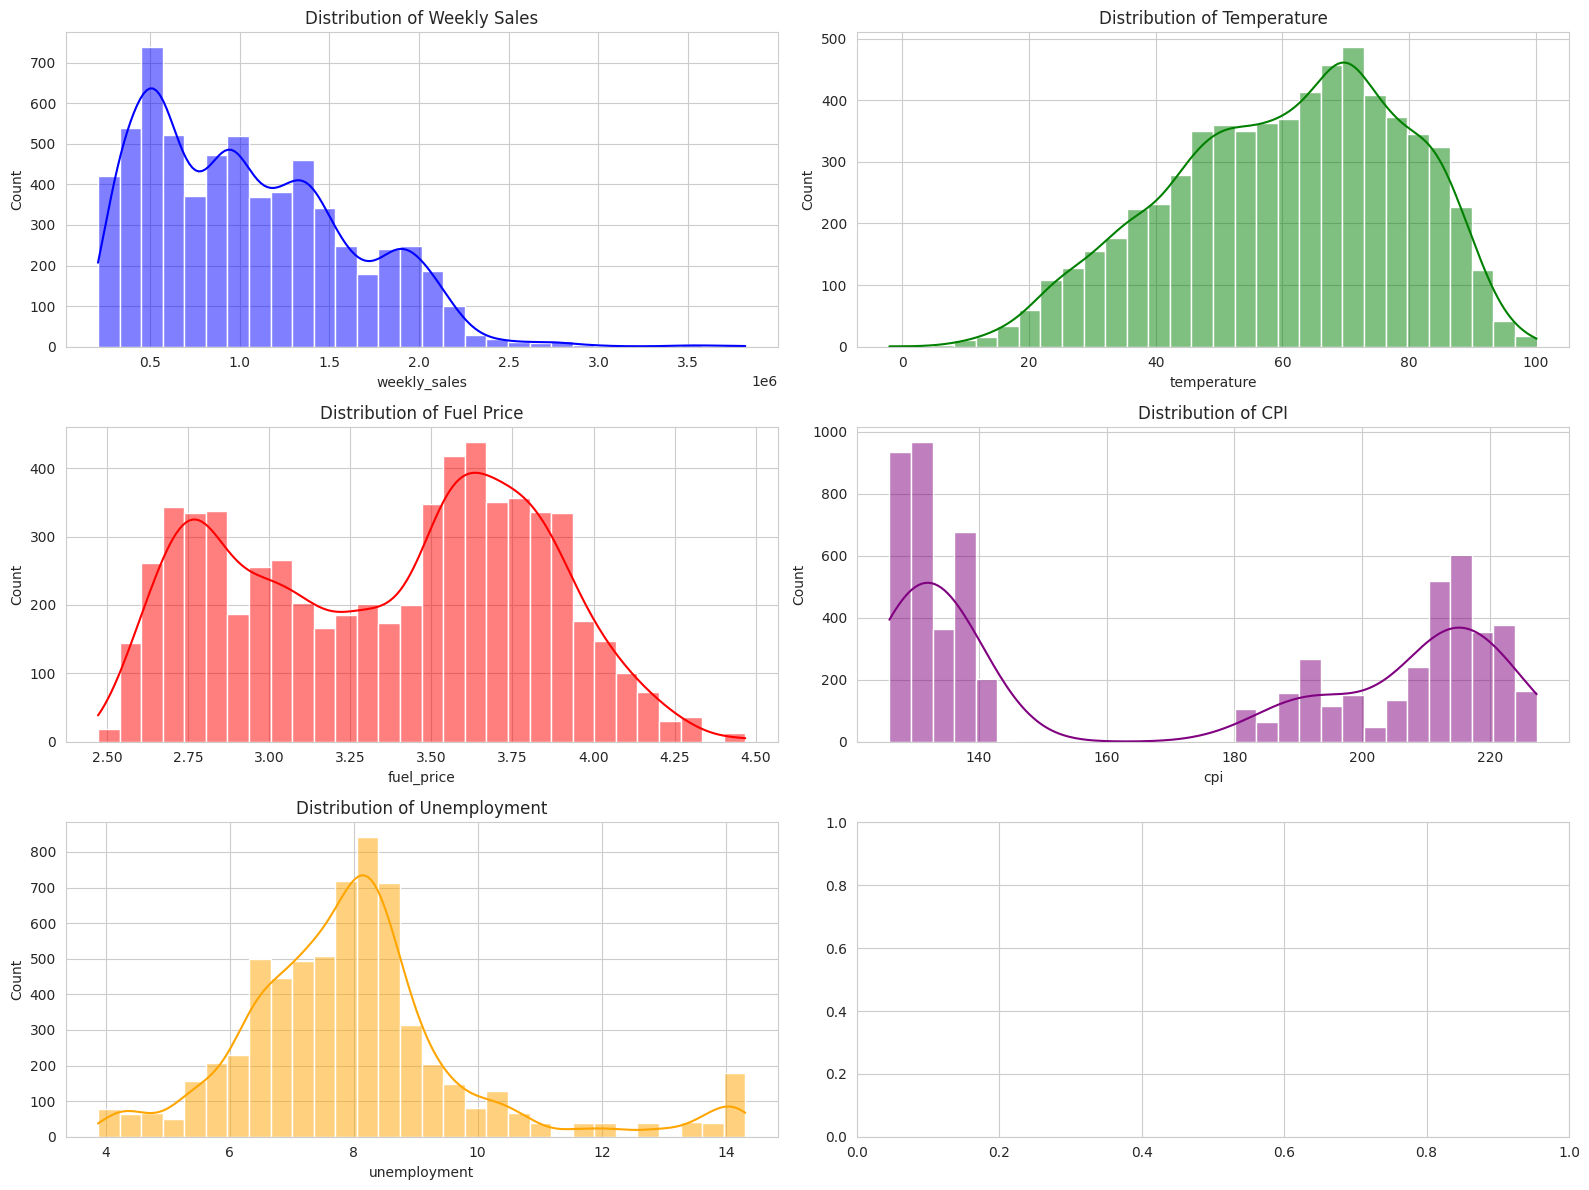

In [305]:
# Ravil
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution Analysis of key numerical features
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

# Weekly Sales Distribution
sns.histplot(data['weekly_sales'], bins=30, kde=True, ax=ax[0, 0], color='blue')
ax[0, 0].set_title('Distribution of Weekly Sales')

# Temperature Distribution
sns.histplot(data['temperature'], bins=30, kde=True, ax=ax[0, 1], color='green')
ax[0, 1].set_title('Distribution of Temperature')

# Fuel Price Distribution
sns.histplot(data['fuel_price'], bins=30, kde=True, ax=ax[1, 0], color='red')
ax[1, 0].set_title('Distribution of Fuel Price')

# CPI Distribution
sns.histplot(data['cpi'], bins=30, kde=True, ax=ax[1, 1], color='purple')
ax[1, 1].set_title('Distribution of CPI')

# Unemployment Distribution
sns.histplot(data['unemployment'], bins=30, kde=True, ax=ax[2, 0], color='orange')
ax[2, 0].set_title('Distribution of Unemployment')

plt.tight_layout()
plt.show()


Conclusion:
* weekly_sales is right skewed.
* Temperature and unemployment follow normal distribution.
* CPI and Fuel_Price follow bimodal distribution.

## Analyzing Categorical Variable

## Holidays Flag (Ravil)



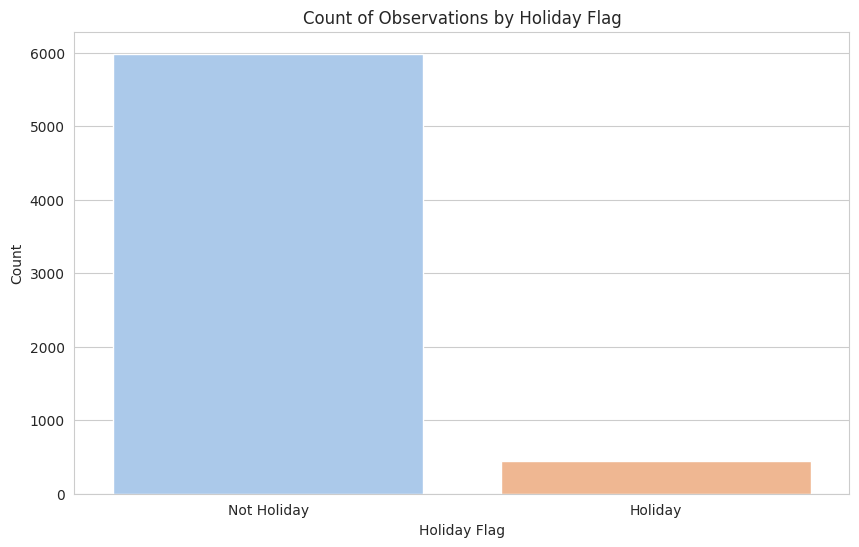

In [306]:
# Showing count of observations by Holiday Flag
sns.countplot(data=data, x="holiday_flag", palette='pastel')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.title('Count of Observations by Holiday Flag')
plt.xticks(ticks=[0, 1], labels=['Not Holiday', 'Holiday'])

plt.show()

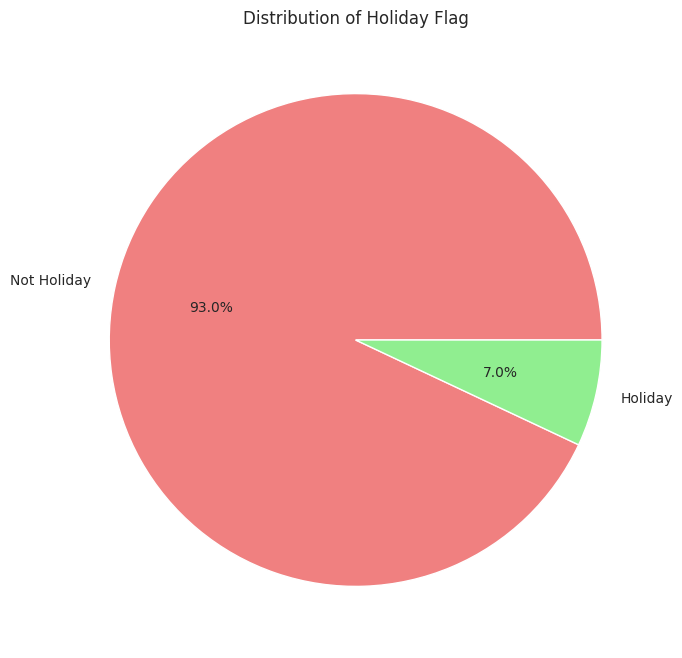

In [307]:
# Creating a pie chart of the holiday flag
plt.figure(figsize=(8, 8))
plt.pie(data['holiday_flag'].value_counts(), labels=['Not Holiday', 'Holiday'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Holiday Flag')
plt.show()

Conclusion: The chart follows a typical pattern of holidays and non-holiday days.

## Season

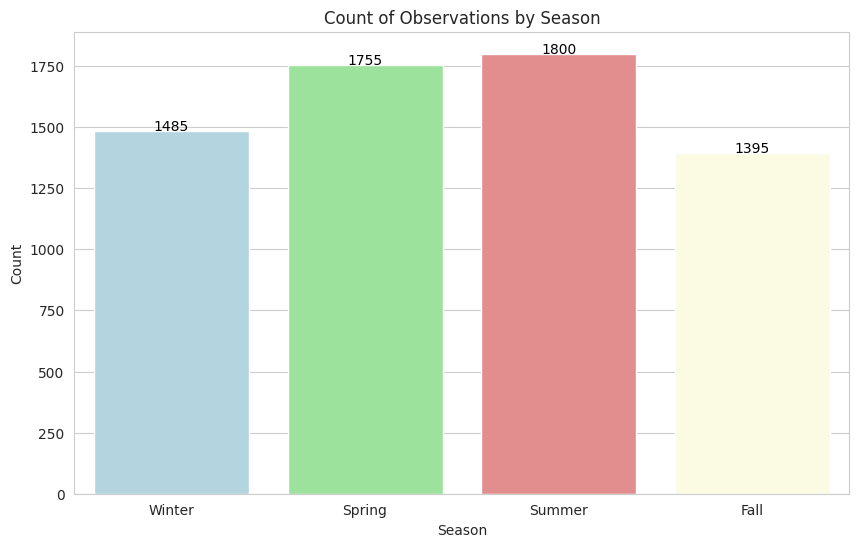

In [308]:
season_counts = data['season'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(data=data, x='season', ax=ax, palette=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])

# Annotate the exact count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

plt.title('Count of Observations by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

* The annotate function is used to add count values on top of each bar.
* season_counts is the count of observations for each season.

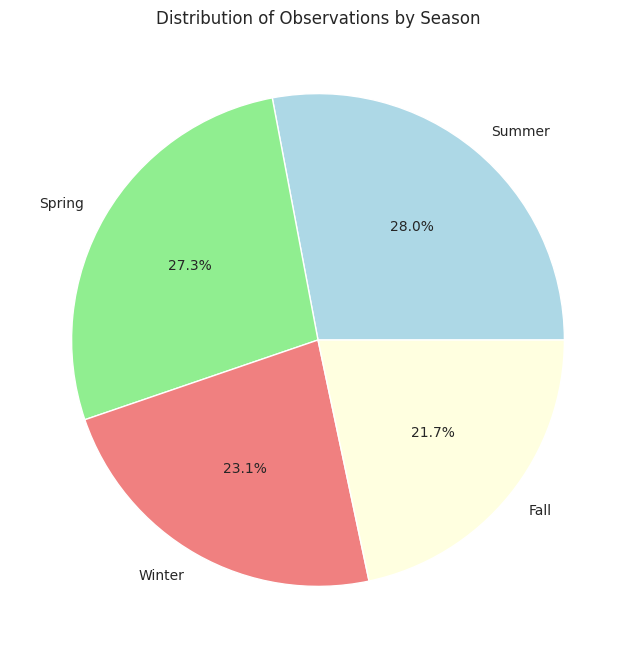

In [309]:
season_counts = data['season'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Distribution of Observations by Season')
plt.show()

* **Best Performance season is Summer**

## Year (Nicolas)

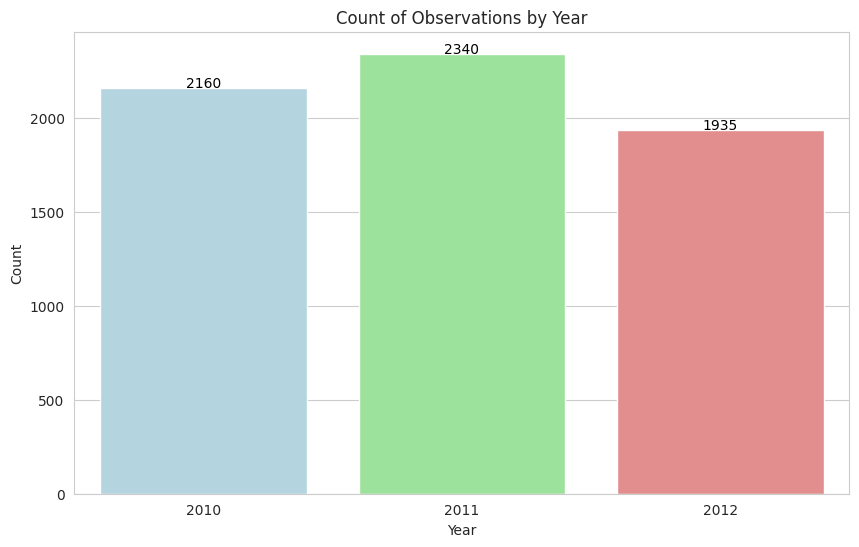

In [310]:
Year_counts = data['year'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(data=data, x='year', ax=ax, palette=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])

# Annotating the exact count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

plt.title('Count of Observations by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

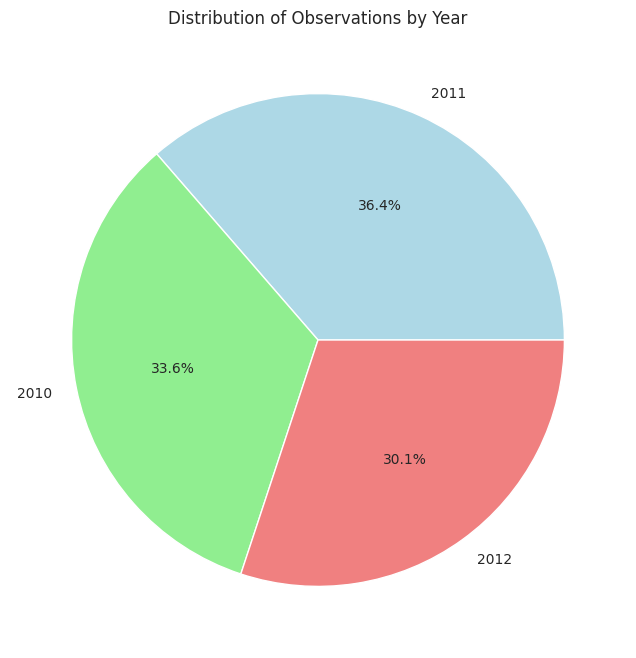

In [311]:
year_counts = data['year'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Distribution of Observations by Year')
plt.show()

* Conclusion: 2011 seems to be the year with the highest frequency of weekly sales based on this dataset.

In [312]:
data.head()

store       date  weekly_sales  holiday_flag  temperature  fuel_price  \
0      1 2010-02-05    1643690.90             0        42.31        2.57   
1      1 2010-02-12    1641957.44             1        38.51        2.55   
2      1 2010-02-19    1611968.17             0        39.93        2.51   
3      1 2010-02-26    1409727.59             0        46.63        2.56   
4      1 2010-03-05    1554806.68             0        46.50        2.62   

     cpi  unemployment  year  quarter  season  month month_name  week  \
0 211.10          8.11  2010        1  Winter      2   February     5   
1 211.24          8.11  2010        1  Winter      2   February     6   
2 211.29          8.11  2010        1  Winter      2   February     7   
3 211.32          8.11  2010        1  Winter      2   February     8   
4 211.35          8.11  2010        1  Winter      3      March     9   

  day_of_week  
0      Friday  
1      Friday  
2      Friday  
3      Friday  
4      Friday

## Month (Mansurbek)

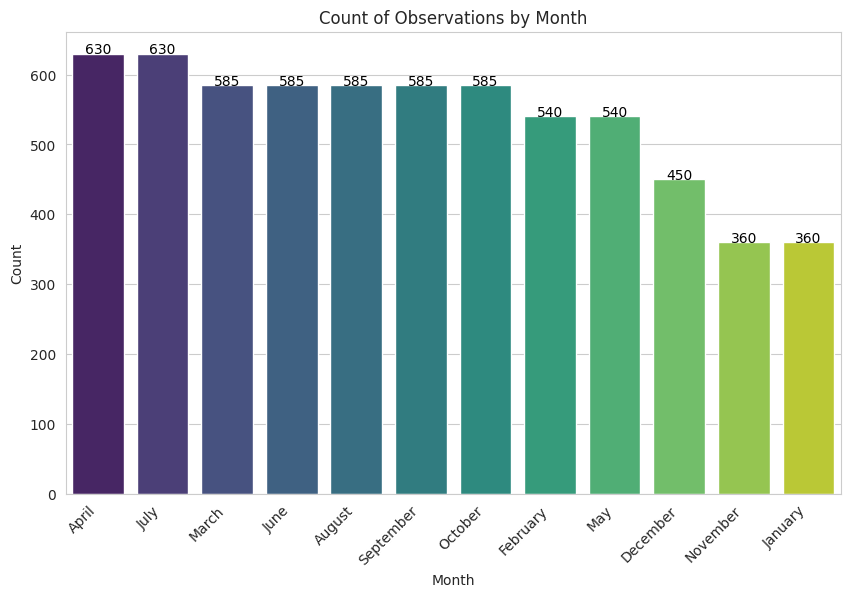

In [313]:
# Mapping numerical month to month names
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
data['month_name'] = data['month'].map(month_mapping)

# Plotting the count of observations by month with the exact count values annotated on top of each bar
fig, ax = plt.subplots(figsize=(10, 6))
order = data['month_name'].value_counts().index
sns.countplot(data=data, x='month_name', ax=ax, order=order, palette='viridis')

# Annotating the exact count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.title('Count of Observations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


* Conclusion: April is the most frequent in the dataset because most of the weekly sales were recorded in this month.

## Store (Mansurbek)

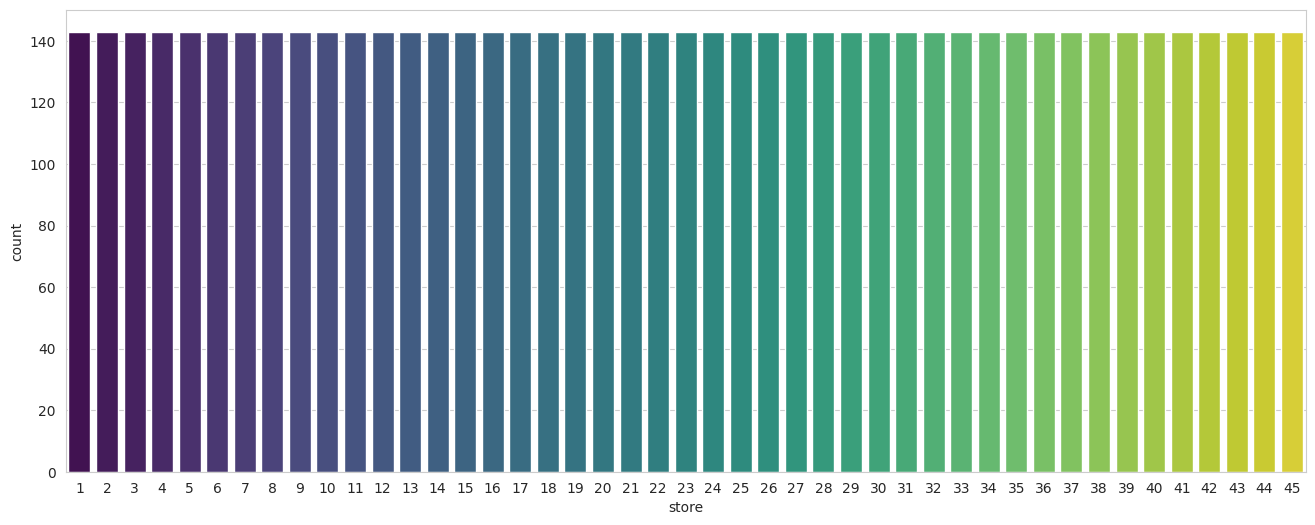

In [314]:
plt.figure(figsize=(16, 6))
sns.countplot(data=data, x='store', palette='viridis')
plt.show()


* Conclusion: All stores are frequent with the same count in the dataset.

## Bi-Variate Analysis (Ravil, Mansurbek)

* Weekly_sales VS Holidays Flag

In [315]:
data.groupby('holiday_flag')['weekly_sales'].mean()

holiday_flag
0   1041256.38
1   1122887.89
Name: weekly_sales, dtype: float64

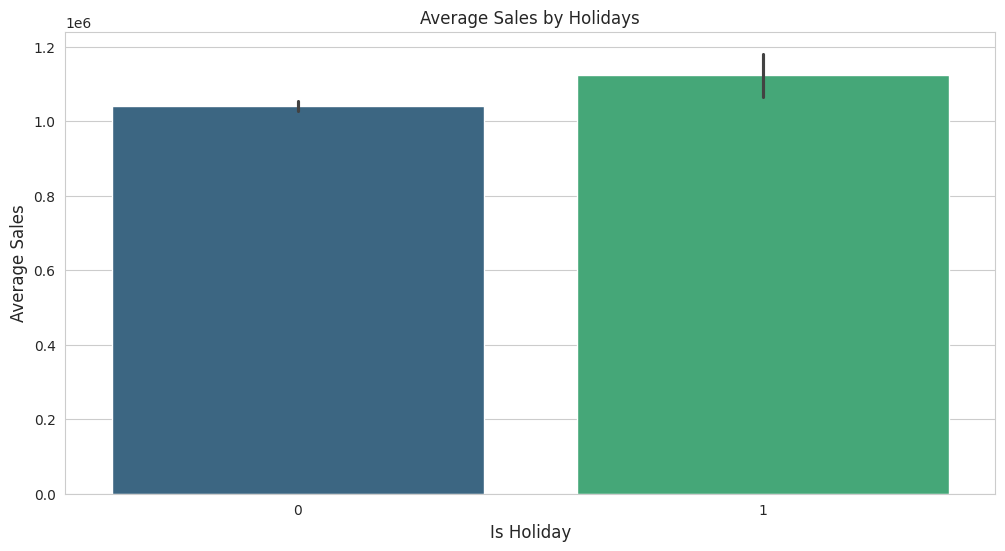

In [316]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data,
            x='holiday_flag',
            y='weekly_sales',
            estimator=np.mean,
            palette='viridis')

plt.title('Average Sales by Holidays')
plt.xlabel('Is Holiday', size=12)
plt.ylabel('Average Sales', size=12)
plt.show()

In [317]:
data.head(5)

store       date  weekly_sales  holiday_flag  temperature  fuel_price  \
0      1 2010-02-05    1643690.90             0        42.31        2.57   
1      1 2010-02-12    1641957.44             1        38.51        2.55   
2      1 2010-02-19    1611968.17             0        39.93        2.51   
3      1 2010-02-26    1409727.59             0        46.63        2.56   
4      1 2010-03-05    1554806.68             0        46.50        2.62   

     cpi  unemployment  year  quarter  season  month month_name  week  \
0 211.10          8.11  2010        1  Winter      2   February     5   
1 211.24          8.11  2010        1  Winter      2   February     6   
2 211.29          8.11  2010        1  Winter      2   February     7   
3 211.32          8.11  2010        1  Winter      2   February     8   
4 211.35          8.11  2010        1  Winter      3      March     9   

  day_of_week  
0      Friday  
1      Friday  
2      Friday  
3      Friday  
4      Friday

## Q2: What are the average sales on holidays and regular days?

In [318]:
data.groupby('holiday_flag')['weekly_sales'].sum()

holiday_flag
0   6231919435.55
1    505299551.56
Name: weekly_sales, dtype: float64

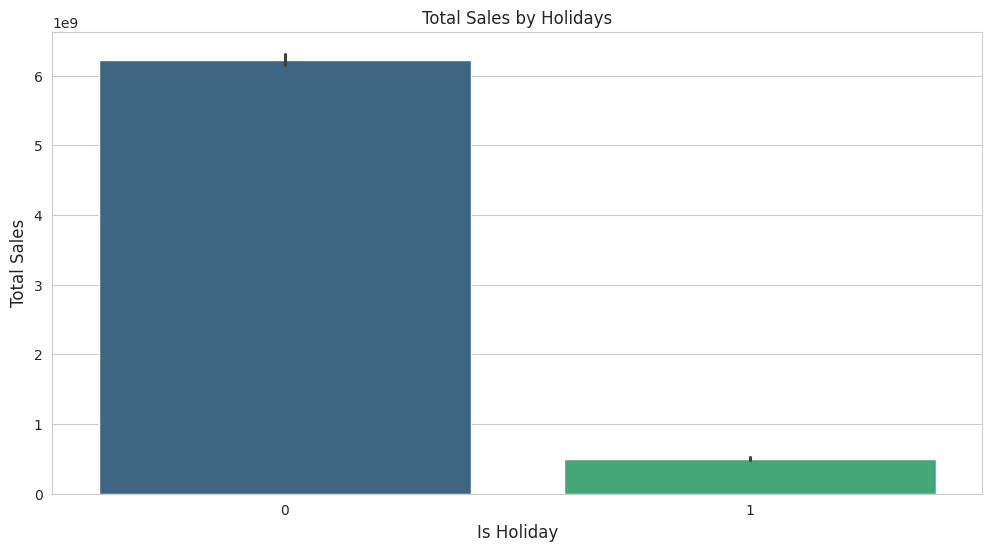

In [319]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data,
            x = 'holiday_flag',
            y = 'weekly_sales',
            estimator = np.sum,
            palette='viridis')

# Adding labels and title
plt.title('Total Sales by Holidays')
plt.xlabel('Is Holiday', size = 12)
plt.ylabel('Total Sales', size = 12)
plt.show()

* The rate of sales on holidays is higher than on other days.
* Total sales on holidays are lower than on other days, which is normal because the number of holidays is very small compared with the number of other days.

## Weakly Sales Vs Store (Nicolas, Ravil)

* Q3: What are the total sales in each store?¶

In [320]:
data.head(5)

store       date  weekly_sales  holiday_flag  temperature  fuel_price  \
0      1 2010-02-05    1643690.90             0        42.31        2.57   
1      1 2010-02-12    1641957.44             1        38.51        2.55   
2      1 2010-02-19    1611968.17             0        39.93        2.51   
3      1 2010-02-26    1409727.59             0        46.63        2.56   
4      1 2010-03-05    1554806.68             0        46.50        2.62   

     cpi  unemployment  year  quarter  season  month month_name  week  \
0 211.10          8.11  2010        1  Winter      2   February     5   
1 211.24          8.11  2010        1  Winter      2   February     6   
2 211.29          8.11  2010        1  Winter      2   February     7   
3 211.32          8.11  2010        1  Winter      2   February     8   
4 211.35          8.11  2010        1  Winter      3      March     9   

  day_of_week  
0      Friday  
1      Friday  
2      Friday  
3      Friday  
4      Friday

In [321]:
grp_store = data.groupby('store')['weekly_sales'].sum().sort_values(ascending = False)

grp_store

store
20   301397792.46
4    299543953.38
14   288999911.34
13   286517703.80
2    275382440.98
10   271617713.89
27   253855916.88
6    223756130.64
1    222402808.85
39   207445542.47
19   206634862.10
31   199613905.50
23   198750617.85
24   194016021.28
11   193962786.80
28   189263680.58
41   181341934.89
32   166819246.16
18   155114734.21
22   147075648.57
12   144287230.15
26   143416393.79
34   138249763.00
40   137870309.79
35   131520672.08
8    129951181.13
17   127782138.83
45   112395341.42
21   108117878.92
25   101061179.17
43    90565435.41
15    89133683.92
7     81598275.14
42    79565752.43
9     77789218.99
29    77141554.31
16    74252425.40
37    74202740.32
30    62716885.12
3     57586735.07
38    55159626.42
36    53412214.97
5     45475688.90
44    43293087.84
33    37160221.96
Name: weekly_sales, dtype: float64

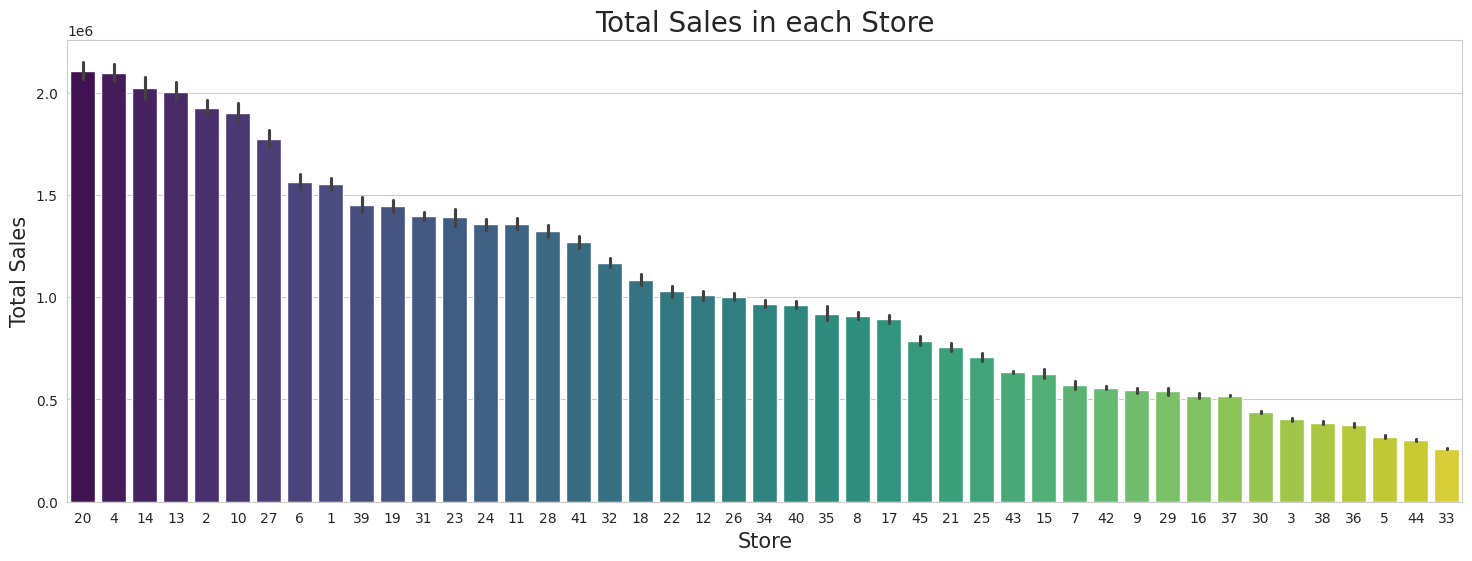

In [322]:
plt.figure(figsize = (18, 6))
sns.barplot(data=data,
            x = 'store',
            y = 'weekly_sales',
            order = grp_store.index,
            palette='viridis')

# Adding labels and title
plt.title('Total Sales in each Store', size = 20)
plt.xlabel('Store', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()

* Conclusion: There is a high variance in weekly sales from one store to another. Store No. 20 has the highest sales from any store with 301,397,792 followed by Store No. 4 with 299,543,953 and Store No. 33 comes last with 37,160,222$.

## Q4: What happens to sales in the different temperatures?

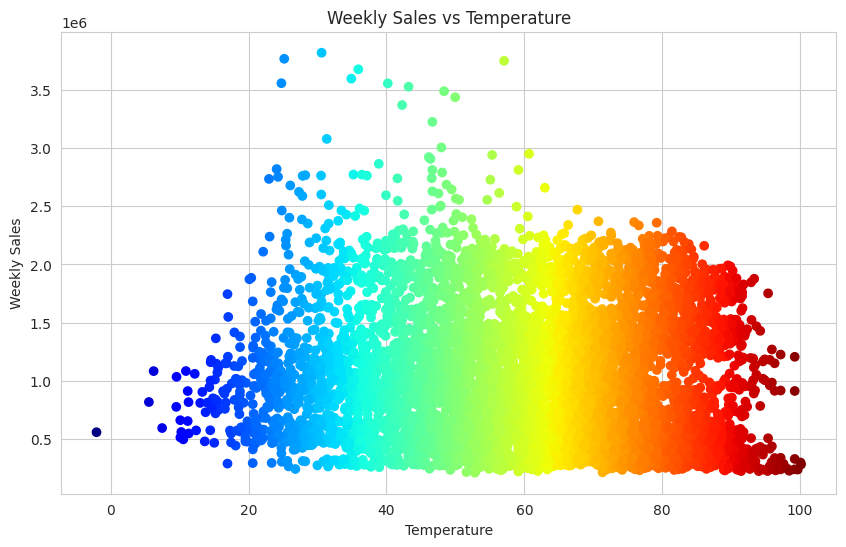

In [323]:
# title Weekly Sales vs Temperature

import matplotlib.pyplot as plt
plt.scatter(data['temperature'], data['weekly_sales'], c=data['temperature'], cmap='jet')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
_ = plt.title('Weekly Sales vs Temperature')

* Conclusion: Sales are not affected by changes in temperature

## Weekly_Sales And Fuel_Price (Ravil)

* Q5: What happens to sales with an increase in fuel price?

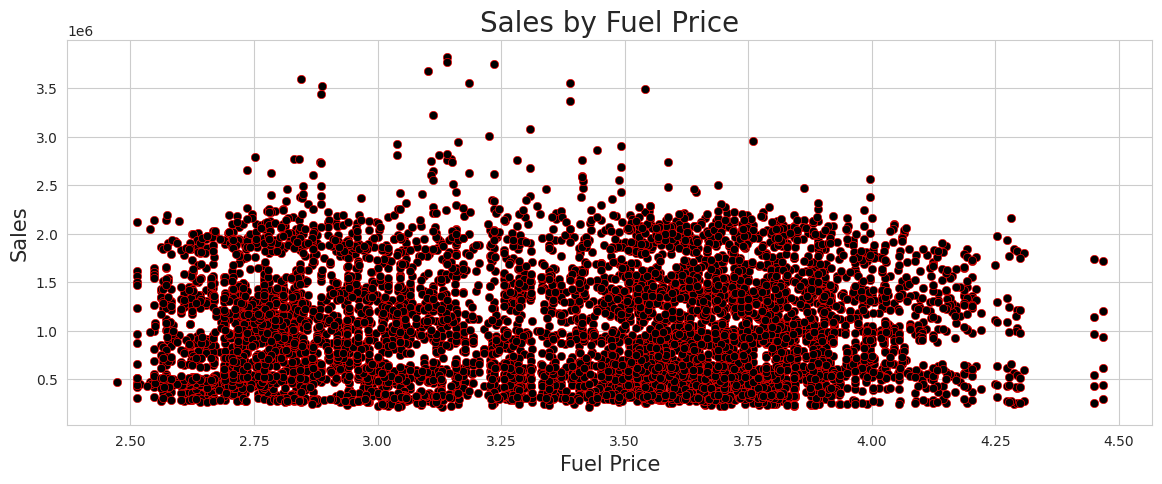

In [324]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = data,
                x = 'fuel_price',
                y = 'weekly_sales',
                color = 'black',
                edgecolor = "red")

# Adding labels and title
plt.title('Sales by Fuel Price', size = 20)
plt.xlabel('Fuel Price', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

* Conclusion: Sales are not affected by an increase in fuel price

## Weekly_Sales And CPI (Nicolas)

* Q6: What happens to sales based on Consumer Price Index (CPI) or the consumer's economic condition?

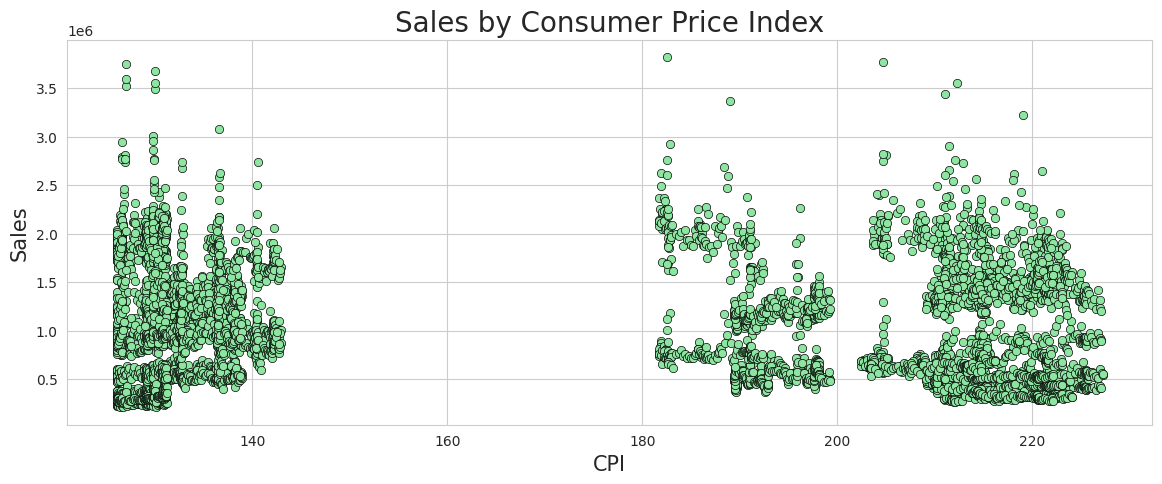

In [325]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = data,
                x = 'cpi',
                y = 'weekly_sales',
                color = '#8de5a1',
                edgecolor = "black")

# Adding labels and title
plt.title('Sales by Consumer Price Index', size = 20)
plt.xlabel('CPI', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

* Conclusion: Consumer Price Index (CPI) has little impact on sales. Based on the distribution of typical consumer prices in the figure above, clients can be categorized into two groups: clients that pay from 120 and 150 are considered middle-class clients. consumers who pay between 180 and 230 are considered high-class consumers.

## Weekly_Sales And Unemployment (Mansurbek)

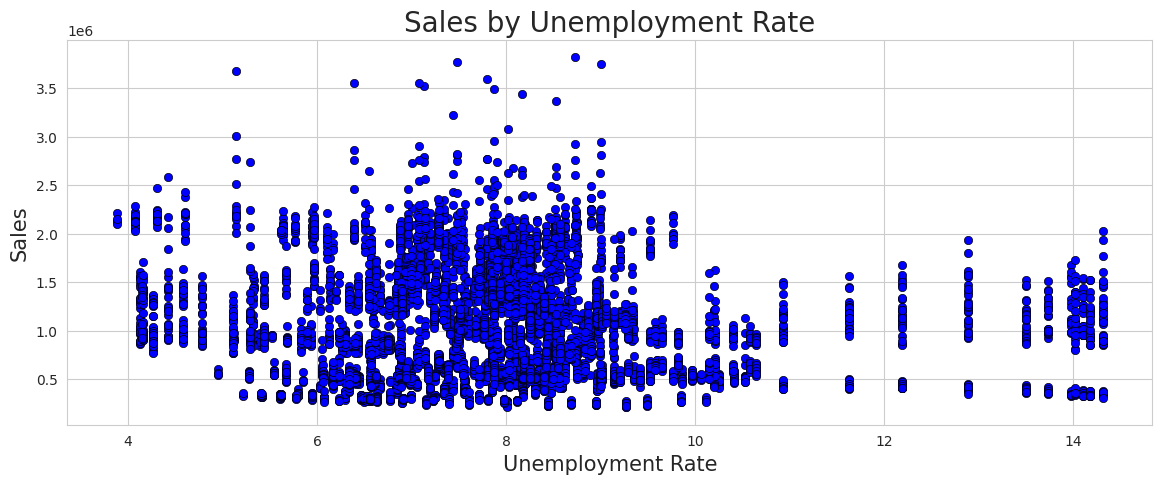

In [326]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = data,
                x = 'unemployment',
                y = 'weekly_sales',
                color = 'blue',
                edgecolor = 'black')

# Adding labels and title
plt.title('Sales by Unemployment Rate', size = 20)
plt.xlabel('Unemployment Rate', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

* Conclusion: Sales are affected by the unemployment rate, so the higher the unemployment rate, the lower the sales.

## Time Series Analysis

*  What are the total sales in each year?

In [327]:
data.groupby('year')['weekly_sales'].sum().sort_values(ascending = False)

year
2011   2448200007.35
2010   2288886120.41
2012   2000132859.35
Name: weekly_sales, dtype: float64

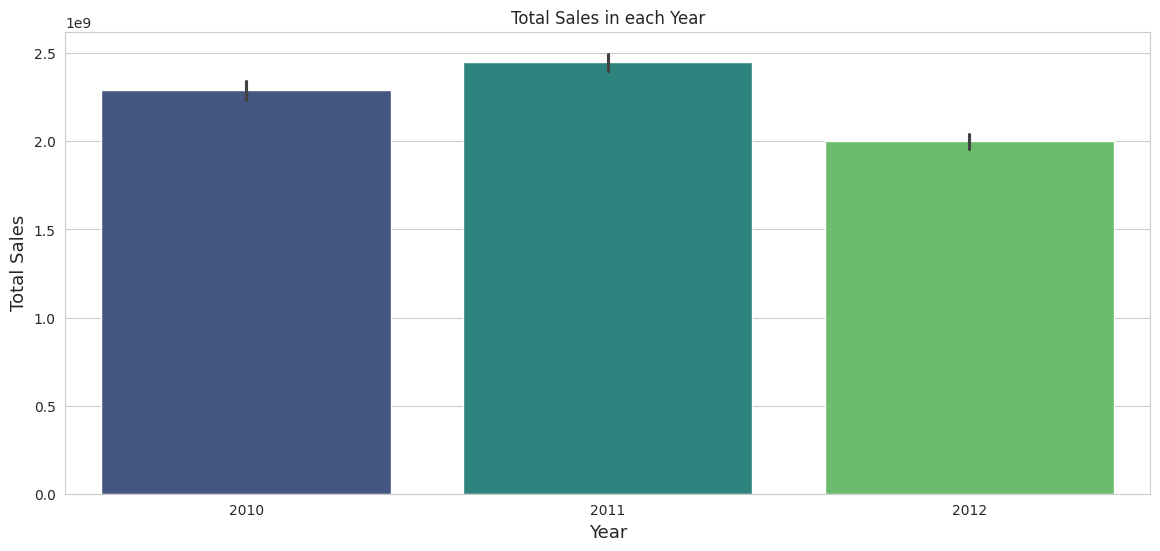

In [328]:
plt.figure(figsize = (14, 6))
sns.barplot(data = data,
            x = 'year',
            y = 'weekly_sales',
            estimator = np.sum,
            palette = 'viridis')

# Add labels and title
plt.title('Total Sales in each Year')
plt.xlabel('Year', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

## Q9: What are the total sales in each season?

In [329]:
data.groupby('season')['weekly_sales'].sum().sort_values(ascending = False)

season
Summer   1841852365.33
Spring   1826615243.76
Fall     1574639147.80
Winter   1494112230.22
Name: weekly_sales, dtype: float64

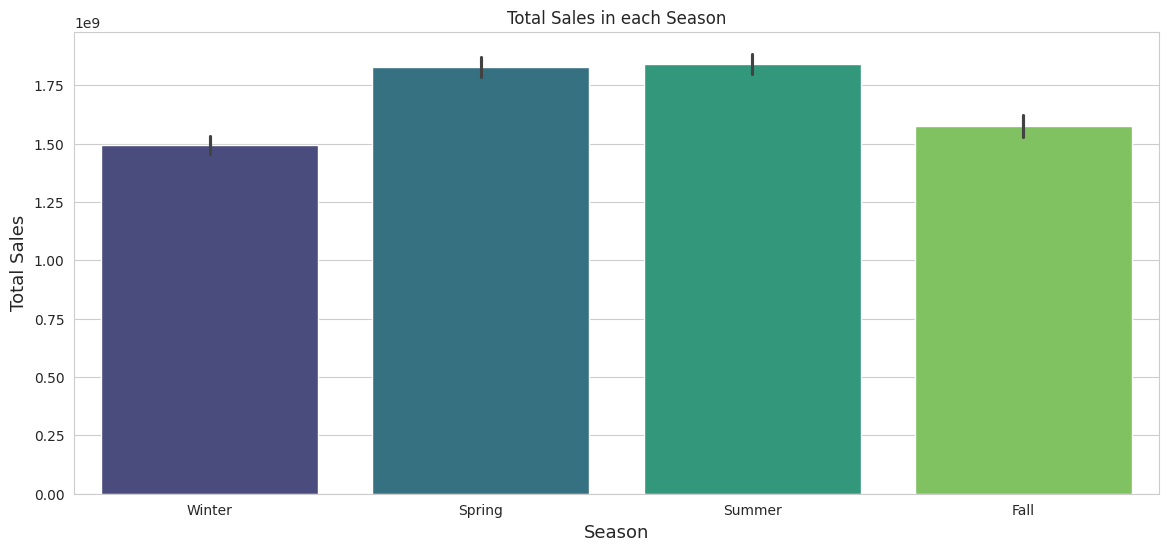

In [330]:
plt.figure(figsize = (14, 6))
sns.barplot(data = data,
            x = 'season',
            y = 'weekly_sales',
            estimator = np.sum,
            palette = 'viridis')

# Add labels and title
plt.title('Total Sales in each Season')
plt.xlabel('Season', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

## Q10: What are the total sales in each month?

In [331]:
data.groupby('month_name')['weekly_sales'].sum().sort_values(ascending = False)

month_name
July        650000977.25
April       646859784.97
June        622629886.84
August      613090208.82
March       592785901.28
October     584784787.59
September   578761179.26
December    576838635.20
February    568727890.45
May         557125571.95
November    413015725.01
January     332598438.49
Name: weekly_sales, dtype: float64

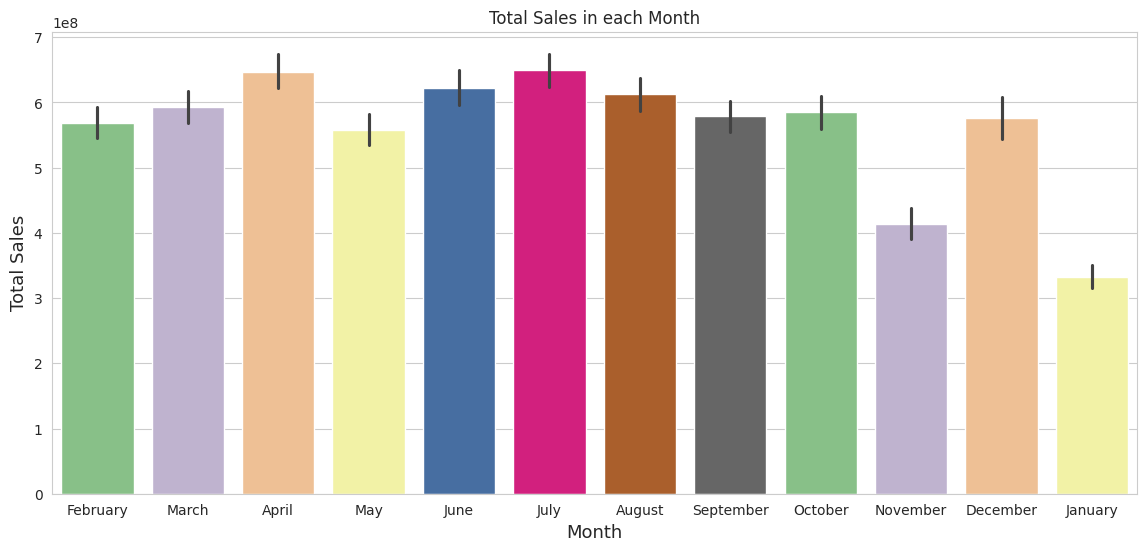

In [332]:
plt.figure(figsize = (14, 6))
sns.barplot(data = data,
            x = 'month_name',
            y = 'weekly_sales',
            estimator = np.sum,
            palette = 'Accent')

# Add labels and title
plt.title('Total Sales in each Month')
plt.xlabel('Month', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

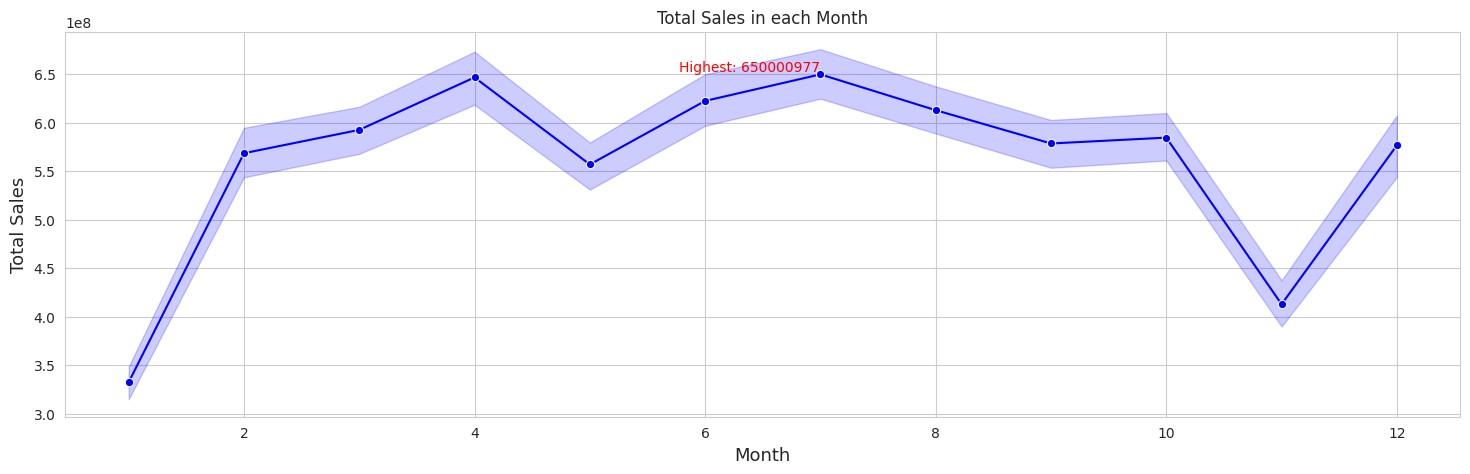

In [333]:
# Assuming you have a DataFrame with columns 'month' and 'weekly_sales'
plt.figure(figsize=(18, 5))
ax = sns.lineplot(data=data, x='month', y='weekly_sales', estimator=np.sum, marker='o', color='blue')

# Find the index of the maximum total sales
max_sales_index = data.groupby('month')['weekly_sales'].sum().idxmax()

# Annotate the highest total sales value with the corresponding month name
max_sales_value = data.groupby('month')['weekly_sales'].sum().max()
ax.annotate(f'Highest: {int(max_sales_value)}', (max_sales_index, max_sales_value),
            ha='right', va='bottom', fontsize=10, color='red')

# Add labels and title
plt.title('Total Sales in each Month')
plt.xlabel('Month', size=13)
plt.ylabel('Total Sales', size=13)
plt.show()

* Conclusion:Total sales for all years in July are the highest from any month, with 650,000,977$.

## Q11: What are the total sales in each week?

In [334]:
grp_week = data.groupby('week')['weekly_sales'].sum().sort_values(ascending = False)
grp_week

week
51   157929656.91
22   147242187.02
7    147190214.86
27   147011815.03
14   146755073.11
6    145682278.34
23   145147453.16
31   143706365.65
24   143481718.70
26   143093116.12
18   142489399.74
5    141989459.71
33   141332752.59
21   140943422.91
34   140774012.49
36   140727684.68
9    140713109.01
25   140161415.84
32   140117438.66
40   139881301.90
35   139730520.31
13   139155684.47
16   138483674.40
10   138033170.02
28   137859561.60
19   137702104.01
15   136786256.63
11   136762805.55
29   136222803.95
20   135990645.29
43   135002768.29
42   134008033.53
8    133865937.54
41   133652808.00
47   132414608.50
30   132410792.67
12   132003954.68
37   131100725.24
17   130951958.38
38   128431158.25
39   128170606.08
50   121906495.79
49   111227918.09
48    99299584.37
45    94599025.58
44    94437526.19
46    91564564.74
1     87731209.72
52    86474980.04
3     82735644.59
2     82696756.52
4     79434827.66
Name: weekly_sales, dtype: float64

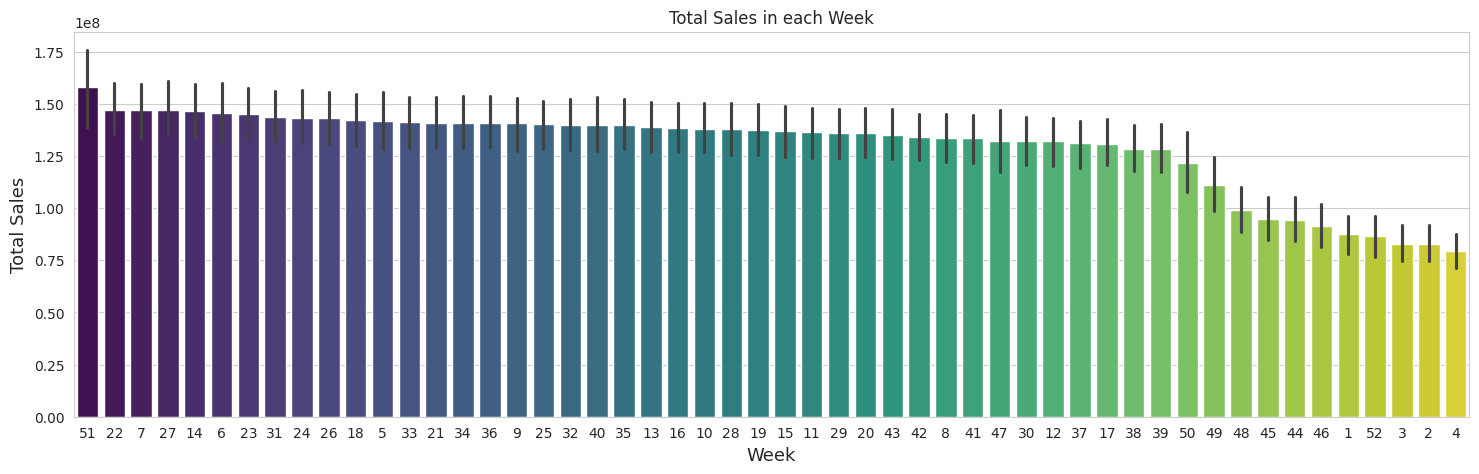

In [335]:
plt.figure(figsize = (18, 5))
sns.barplot(data = data,
            x = 'week',
            y = 'weekly_sales',
            estimator = np.sum,
            order = grp_week.index,
            palette = 'viridis')

# Add labels and title
plt.title('Total Sales in each Week')
plt.xlabel('Week', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

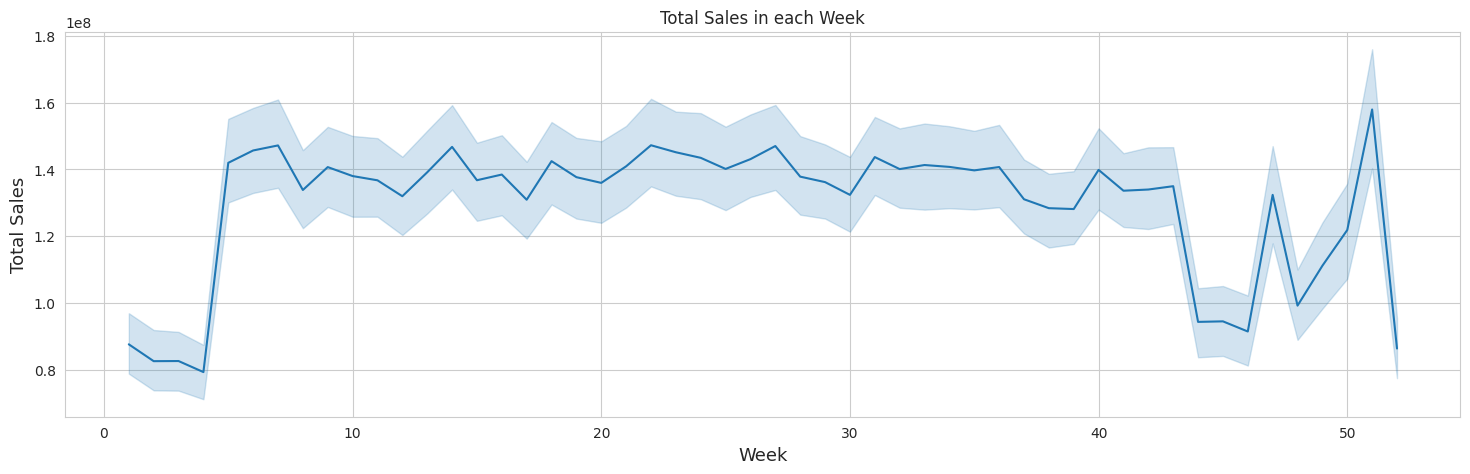

In [336]:
plt.figure(figsize = (18, 5))
sns.lineplot(data = data,
            x = 'week',
            y = 'weekly_sales',
            estimator = np.sum)

# Add labels and title
plt.title('Total Sales in each Week')
plt.xlabel('Week', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

<Axes: xlabel='week'>

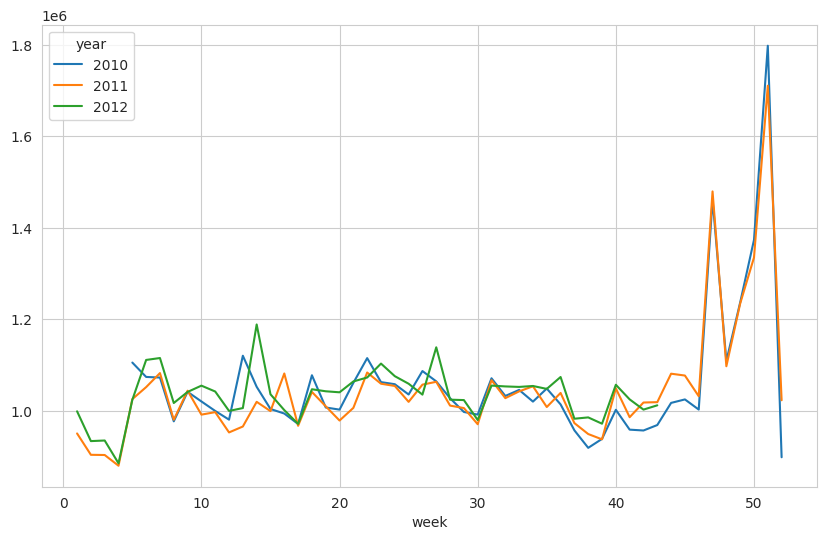

In [337]:
weekly_sales = pd.pivot_table(data, values = "weekly_sales", columns = "year", index = "week")
weekly_sales.plot()

* Conclusion:Total sales for all years in week 51 are the highest from any week, with 157,929,657$

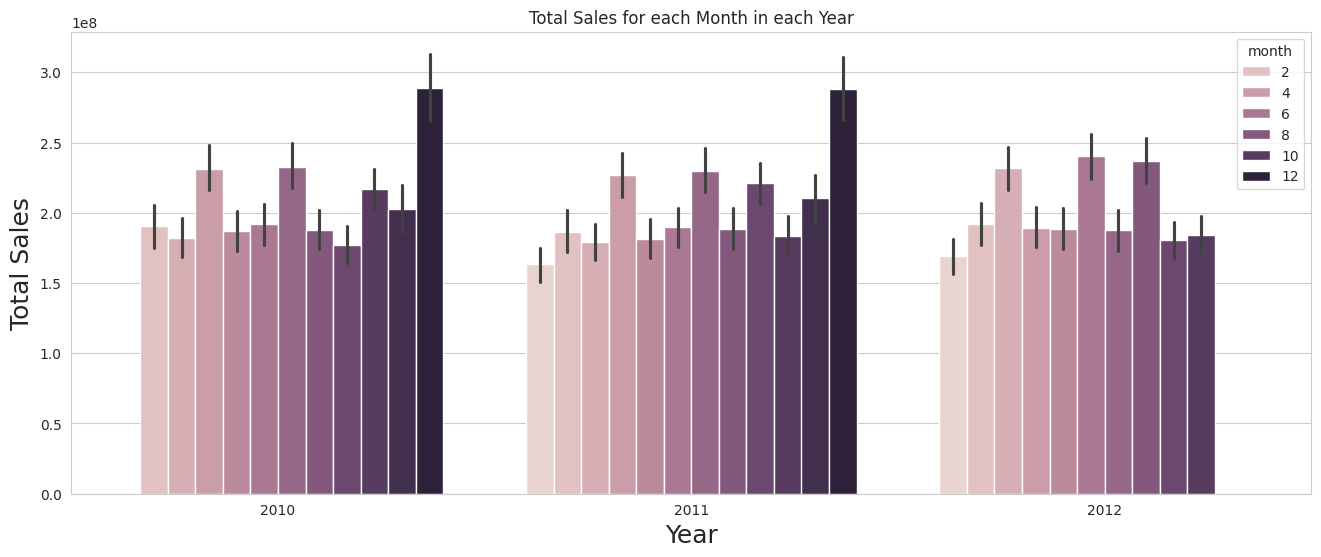

In [338]:
plt.figure(figsize = (16, 6))
sns.barplot(data = data,
            x = 'year',
            y = 'weekly_sales',
            hue = 'month',
            estimator = np.sum)

# Add labels and title
plt.title('Total Sales for each Month in each Year')
plt.xlabel('Year', size = 18)
plt.ylabel('Total Sales', size = 18)

plt.show()

**Conclusion:Total sales in December 2010, 2011 are the highest in the three years, where:**

* In 2010, total sales in December were the highest with 288,760,533.
* In 2011, total sales in December were the highest with 288,760,533.
* In 2012, total sales in June were the highest with 240,610,329$.

## Q13: What are the total sales in each year regarding the season?

In [339]:
pd.pivot_table(data = data,
               index = 'year',
               columns = 'season',
               values = 'weekly_sales',
               aggfunc = 'sum')

season         Fall       Spring       Summer       Winter
year                                                      
2010   708775726.88 610369474.75 597488133.24 372252785.54
2011   681501740.50 597948054.32 639358469.54 529391742.99
2012   184361680.42 618297714.69 605005762.55 592467701.69

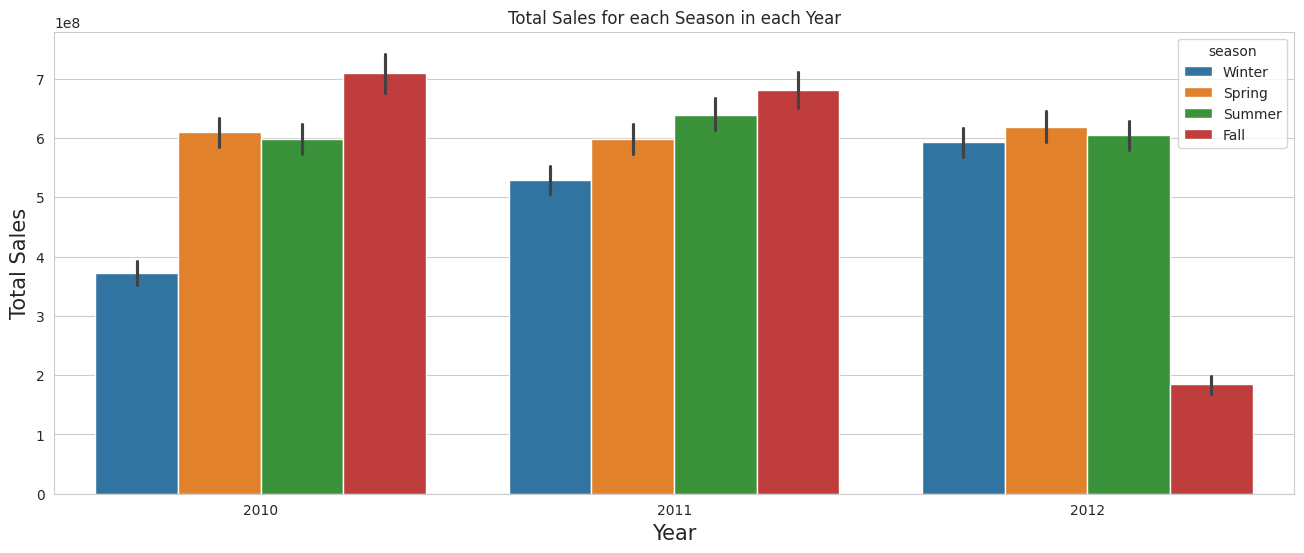

In [340]:
plt.figure(figsize = (16, 6))
sns.barplot(data = data,
            x = 'year',
            y = 'weekly_sales',
            hue = 'season',
            estimator = np.sum)

# Add labels and title
plt.title('Total Sales for each Season in each Year')
plt.xlabel('Year', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()

## Q14: What are the total sales in each year regarding the day of the week?

In [341]:
pd.pivot_table(data = data,
               index = 'year',
               columns = 'day_of_week',
               values = 'weekly_sales',
               aggfunc = 'sum')

day_of_week        Friday
year                     
2010        2288886120.41
2011        2448200007.35
2012        2000132859.35

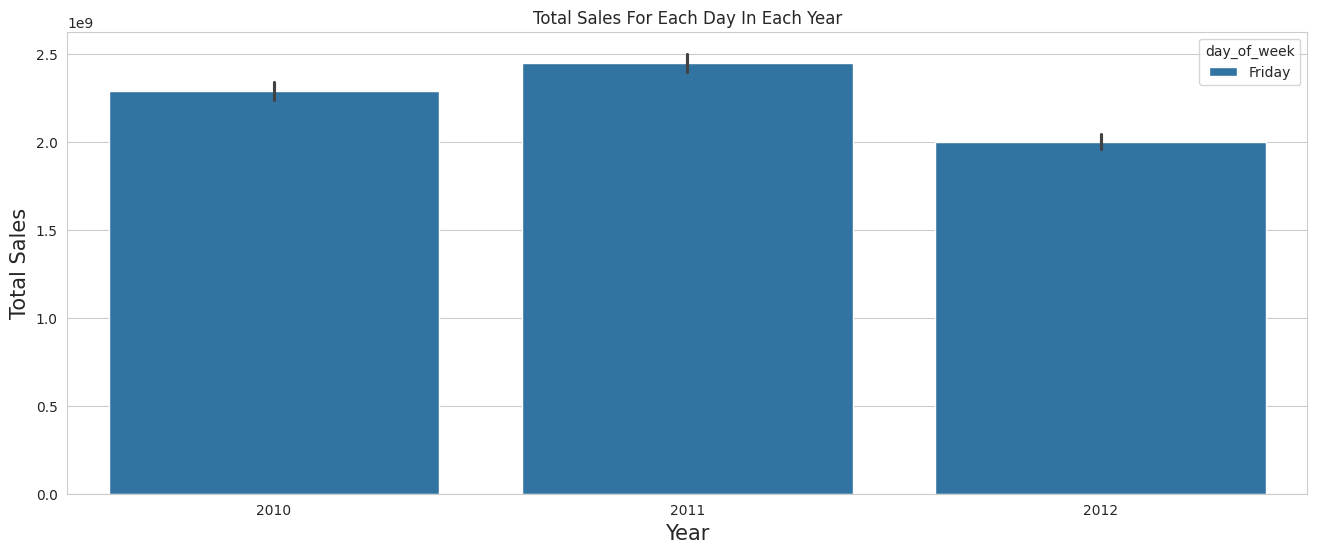

In [342]:
plt.figure(figsize = (16, 6))
sns.barplot(data = data,
            x = 'year',
            y = 'weekly_sales',
            hue = 'day_of_week',
            estimator = np.sum,)

# Add labels and title
plt.title('Total Sales For Each Day In Each Year')
plt.xlabel('Year', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()

## Q15: What happened to the total sales over time?

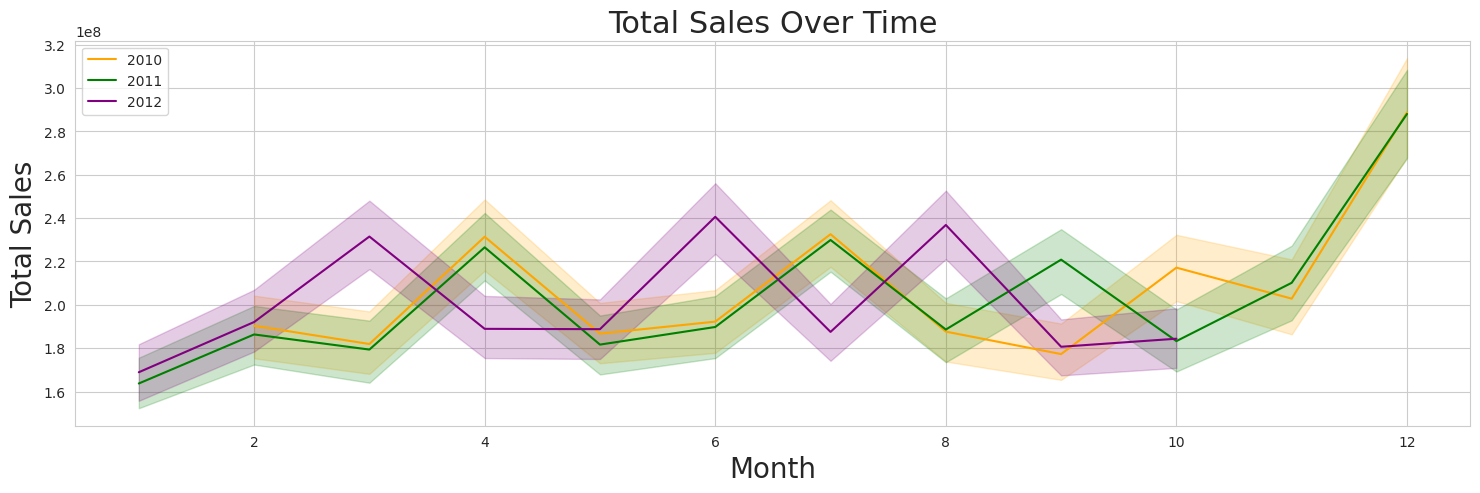

In [343]:
years = ['2010', '2011', '2012']
colors = ['orange', 'green', 'purple']  # Change the colors as needed

plt.figure(figsize=(18, 5))
for i, year in enumerate(years):
    sns.lineplot(data=data[data['year'] == int(year)],
                 x='month',
                 y='weekly_sales',
                 estimator=np.sum,
                 color=colors[i],
                 label=year)

# Add labels and title
plt.title(f'Total Sales Over Time', size=22)
plt.xlabel('Month', size=20)
plt.ylabel('Total Sales', size=20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

* Conclusion: Sales are similar in most months, but they increased at the end of 2010 and 2011 and decreased at the end of 2012.

## Q17: What happened to the average sales over time?

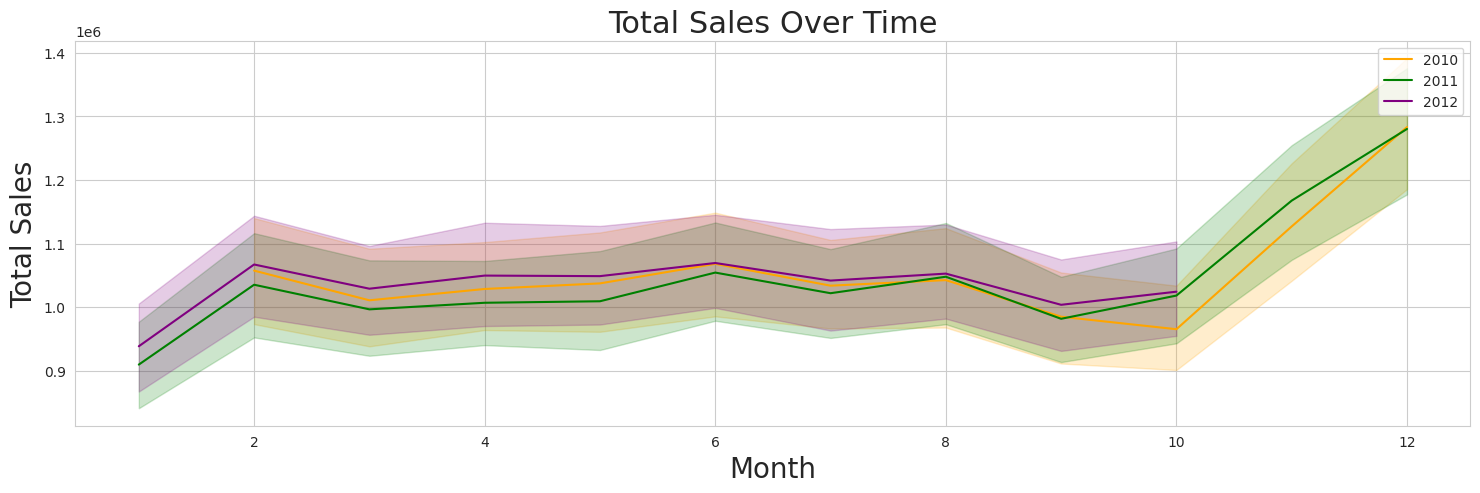

In [344]:
plt.figure(figsize = (18, 5))
for i, year in enumerate(years):
    sns.lineplot(data = data[data['year'] == int(year)],
                 x = 'month',
                 y = 'weekly_sales',
                 estimator = np.mean,
                 color = colors[i],
                 label = year)

# Add labels and title
plt.title(f'Total Sales Over Time', size = 22)
plt.xlabel('Month', size = 20)
plt.ylabel('Total Sales', size = 20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

* Conclusion: Sales rates are similar in most months, but they increased at the end of 2010 and 2011 and decreased at the end of 2012.

## Q18: What happens to the unemployment rate over time?

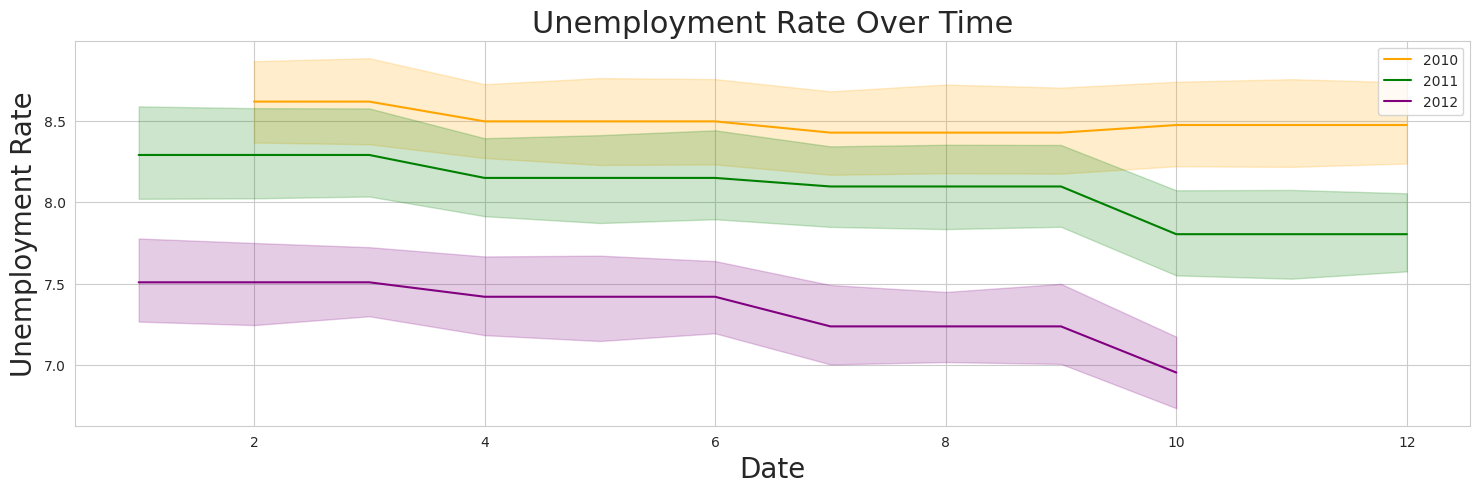

In [345]:
plt.figure(figsize = (18, 5))
for i, year in enumerate(years):
    sns.lineplot(data = data[data['year'] == int(year)],
                 x = 'month',
                 y = 'unemployment',
                 estimator = np.mean,
                 color = colors[i],
                 label = year)

# Add labels and title
plt.title(f'Unemployment Rate Over Time', size = 22)
plt.xlabel('Date', size = 20)
plt.ylabel('Unemployment Rate', size = 20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

* Conclusion:The unemployment rate decreases over time.

## Q19: What happens to the fuel price rate over time?

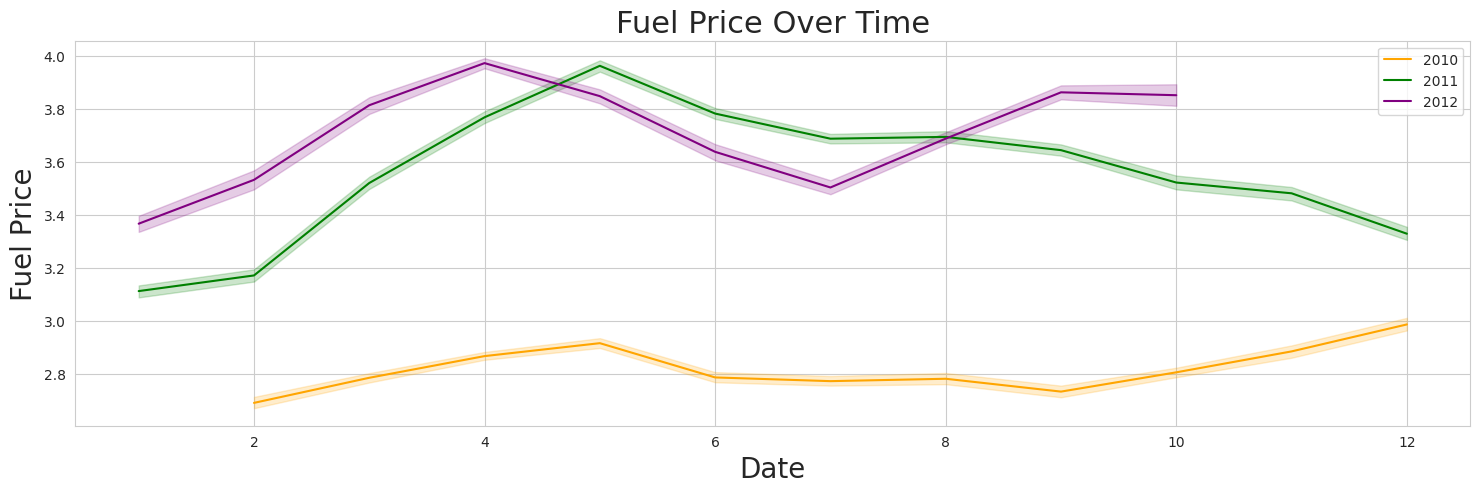

In [346]:
plt.figure(figsize = (18, 5))
for i, year in enumerate(years):
    sns.lineplot(data = data[data['year'] == int(year)],
                 x = 'month',
                 y = 'fuel_price',
                 estimator = np.mean,
                 color = colors[i],
                 label = year)

# Add labels and title
plt.title(f'Fuel Price Over Time', size = 22)
plt.xlabel('Date', size = 20)
plt.ylabel('Fuel Price', size = 20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

* Conclusion:The fuel price increases over time.

# Data Correlation (Ravil, Mansurbek, Nicolas)

## Fuel Price vs. Weekly Sales (Mansurbek)

In [347]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'fuel_price' and 'weekly_sales':
from scipy.stats import pearsonr

# Assuming we have a DataFrame 'data' with columns 'fuel_price' and 'weekly_sales'
pearson_coef, p_value = pearsonr(data['fuel_price'], data['weekly_sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.009463786314475135 with a P-value of P = 0.44782874894858093


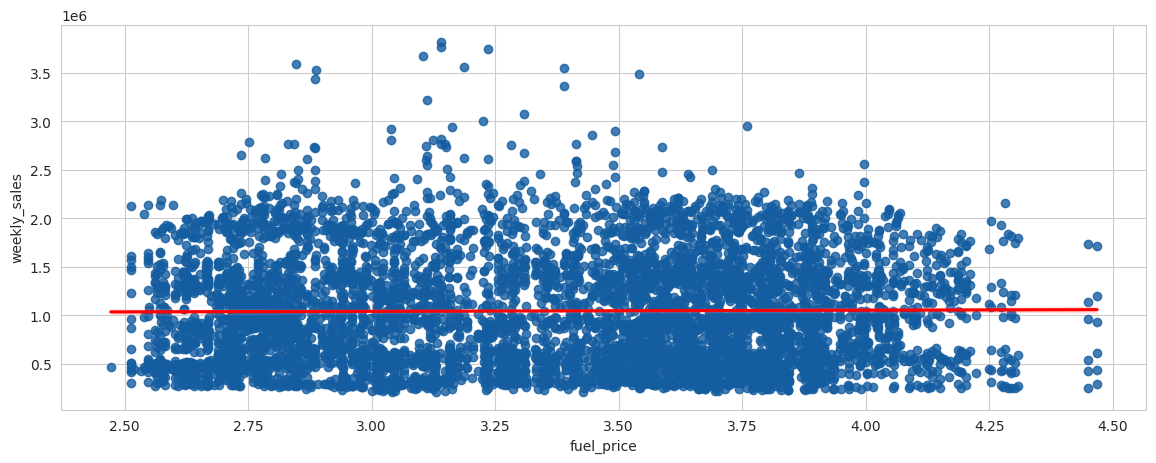

In [348]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'fuel_price', y = 'weekly_sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

Conclusion:
* Since the p-value is > 0.1, the correlation between fuel price and weekly sales is not statistically significant.
* Fuel price does not seem like a good predictor of the weekly sales at all since the regression line is close to horizontal. Therefore, it's not a reliable variable

## Unemployment vs. Weekly Sales (Mansurbek)

In [349]:
pearson_coef, p_value = pearsonr(data['unemployment'], data['weekly_sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.10617608965795423 with a P-value of P = 1.3448365210234661e-17


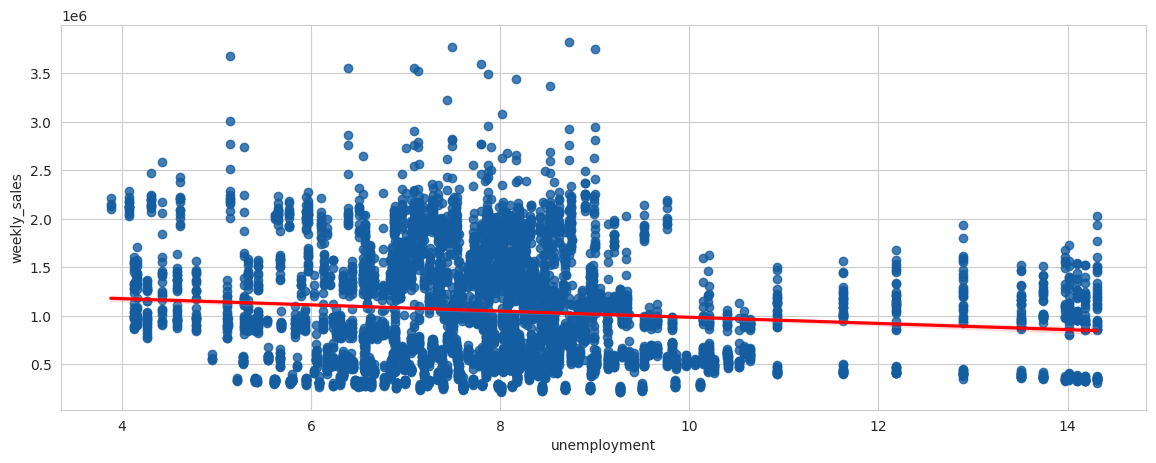

In [350]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'unemployment', y = 'weekly_sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

Conclusion:
* Since the p-value is < 0.001, the correlation between unemployment and weekly sales is strong evidence that the correlation is significant.
* Unemployment seems like a good predictor of the weekly sales, The higher the unemployment rate, the lower the weekly sales

## CPI vs. Weekly Sales (Ravil)

In [351]:
pearson_coef, p_value = pearsonr(data['cpi'], data['weekly_sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.07263416204017623 with a P-value of P = 5.438292612176735e-09


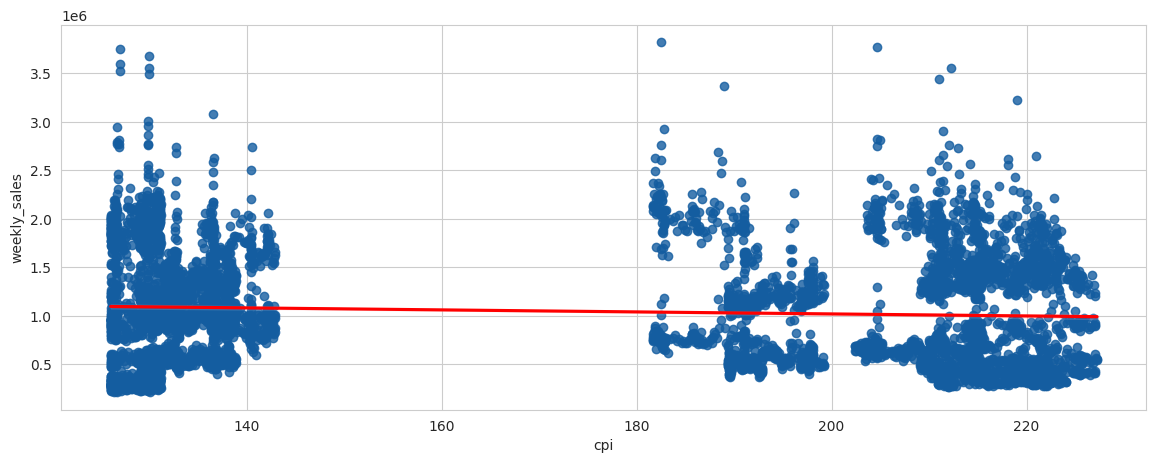

In [352]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'cpi', y = 'weekly_sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

* Conclusion: Since the p-value is < 0.001, the correlation between CPI and weekly sales is strong evidence that the correlation is significant

## Temperature vs. Weekly Sales (Ravil)

In [353]:
pearson_coef, p_value = pearsonr(data['temperature'], data['weekly_sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.06381001317946956 with a P-value of P = 3.007647625833226e-07


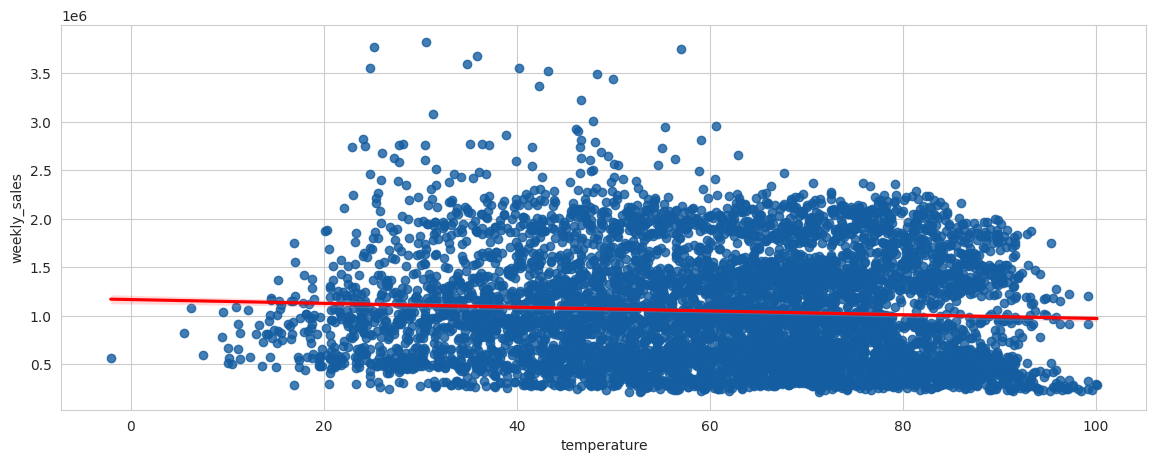

In [354]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'temperature', y = 'weekly_sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

Conclusion:

* Since the p-value is < 0.05, the correlation between temperature and weekly sales is moderate evidence that the correlation is significant.
* Temperature seems like a good predictor of the weekly sales, The higher the Temperature rate, the lower the weekly sales.

## Data Correlation Analysis (Nicolas)

In [355]:
# Correlations with weekly sales
corr = data[['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']].corr()['weekly_sales'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

* The correlation analysis shows only weak relationships between Weekly Sales and the studied factors. Fuel prices have an almost negligible positive correlation, suggesting limited impact on sales. Temperature, CPI, and Unemployment are all negatively correlated with Weekly Sales, with Unemployment showing the strongest negative relationship, though it is still weak. These factors alone are unlikely to be strong predictors of Weekly Sales.

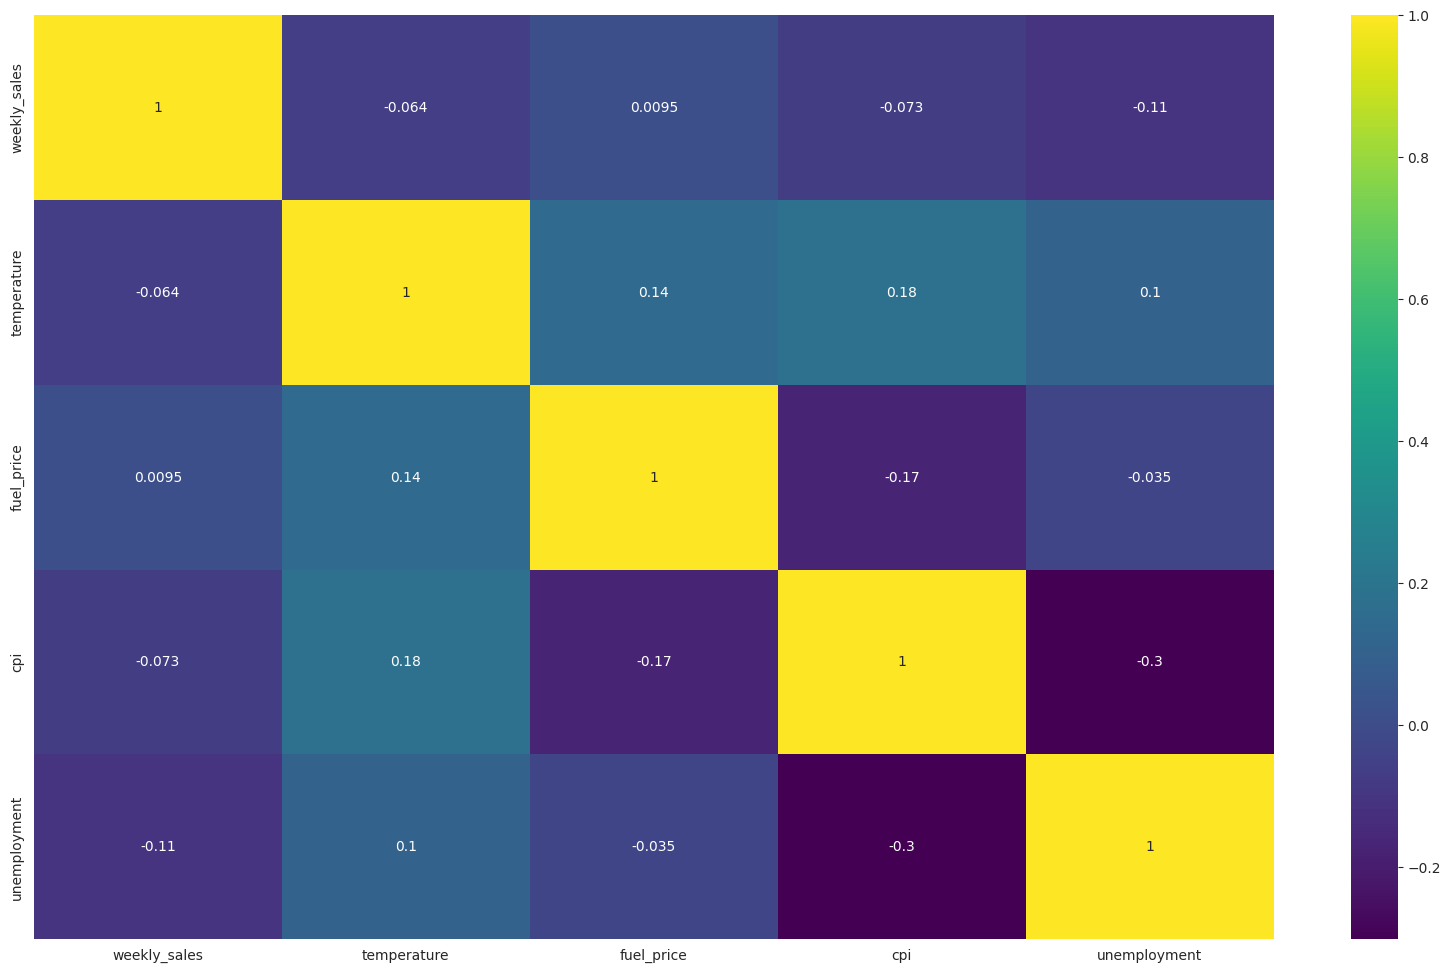

In [356]:
plt.figure(figsize = (20, 12))
sns.heatmap(data[['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']].corr(), annot = True, cmap='viridis')
plt.show()

* Drop non numaric column - month_name

In [357]:
data.head(5)

store       date  weekly_sales  holiday_flag  temperature  fuel_price  \
0      1 2010-02-05    1643690.90             0        42.31        2.57   
1      1 2010-02-12    1641957.44             1        38.51        2.55   
2      1 2010-02-19    1611968.17             0        39.93        2.51   
3      1 2010-02-26    1409727.59             0        46.63        2.56   
4      1 2010-03-05    1554806.68             0        46.50        2.62   

     cpi  unemployment  year  quarter  season  month month_name  week  \
0 211.10          8.11  2010        1  Winter      2   February     5   
1 211.24          8.11  2010        1  Winter      2   February     6   
2 211.29          8.11  2010        1  Winter      2   February     7   
3 211.32          8.11  2010        1  Winter      2   February     8   
4 211.35          8.11  2010        1  Winter      3      March     9   

  day_of_week  
0      Friday  
1      Friday  
2      Friday  
3      Friday  
4      Friday

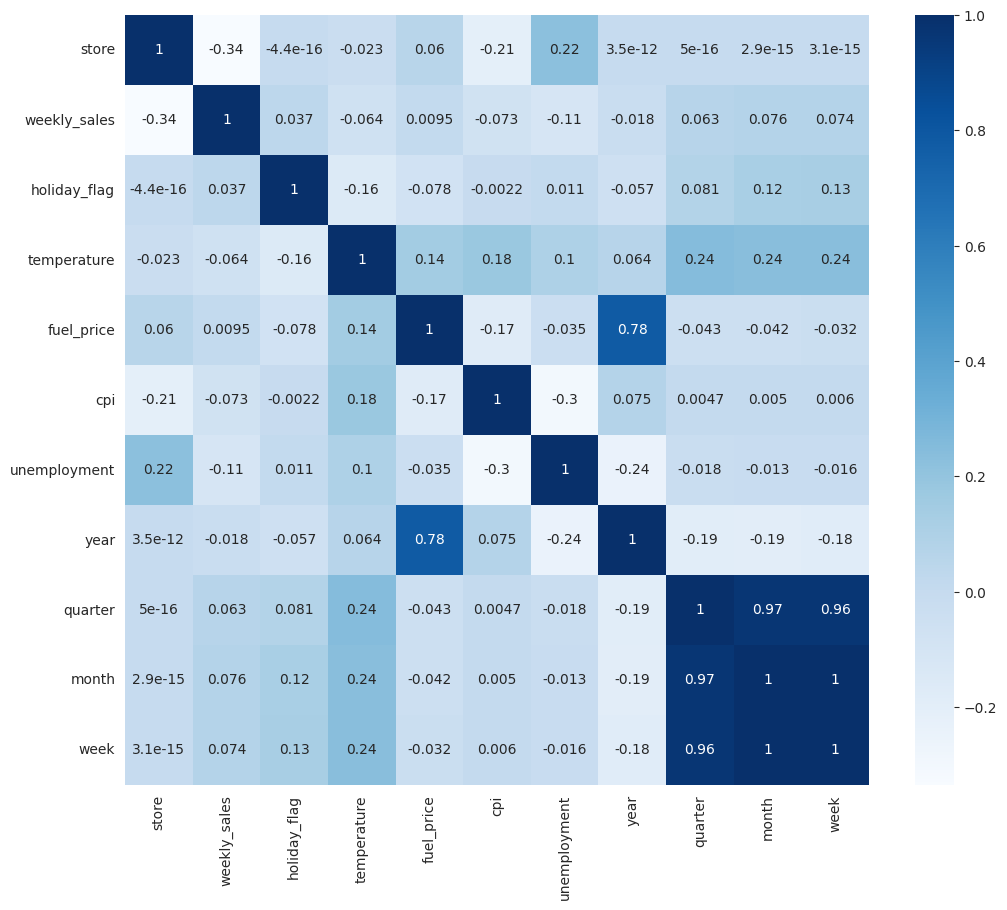

In [358]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(numeric_only=True),cmap='Blues',annot=True);

# Data Pre-processing (Nicolas)

In [359]:
data_new = data.copy() # taking copy of the dataset

In [360]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
 8   year          6435 non-null   int32         
 9   quarter       6435 non-null   int32         
 10  season        6435 non-null   object        
 11  month         6435 non-null   int32         
 12  month_name    6435 non-null   object        
 13  week          6435 non-null   UInt32        
 14  day_of_week   6435 non-null   object        
dtypes: UInt32(1), datetime64[ns](1), float

## **Dropping Unnecessary Columns**

Let's drop columns 'date', 'year' and drop columns 'quarter' and 'month' since there are the same columns as 'season' and 'month_name'.

In the "day_of_week" column, Friday is the most frequent with 67.1% compared to other days, so the model will be biased to the class of Friday, so it prefers to drop this column to avoid underfitting.

In [361]:
data_new.drop(['date', 'year', 'quarter', 'month', 'day_of_week'], axis = 1, inplace = True)

In [362]:
data_new.dtypes

store             int64
weekly_sales    float64
holiday_flag      int64
temperature     float64
fuel_price      float64
cpi             float64
unemployment    float64
season           object
month_name       object
week             UInt32
dtype: object

In [363]:
# let's handle store and holiday columns as categorical features, so we should convert them into categories (objects).bb
data_new['store'] = data_new['store'].astype('object')
data_new['holiday_flag'] = data_new['holiday_flag'].astype('object')
data_new['week'] = data_new['week'].astype('object')

In [364]:
data_new.dtypes

store            object
weekly_sales    float64
holiday_flag     object
temperature     float64
fuel_price      float64
cpi             float64
unemployment    float64
season           object
month_name       object
week             object
dtype: object

## Detecting And Removing The Outliers

0 fuel_price
1 temperature
2 cpi
3 unemployment


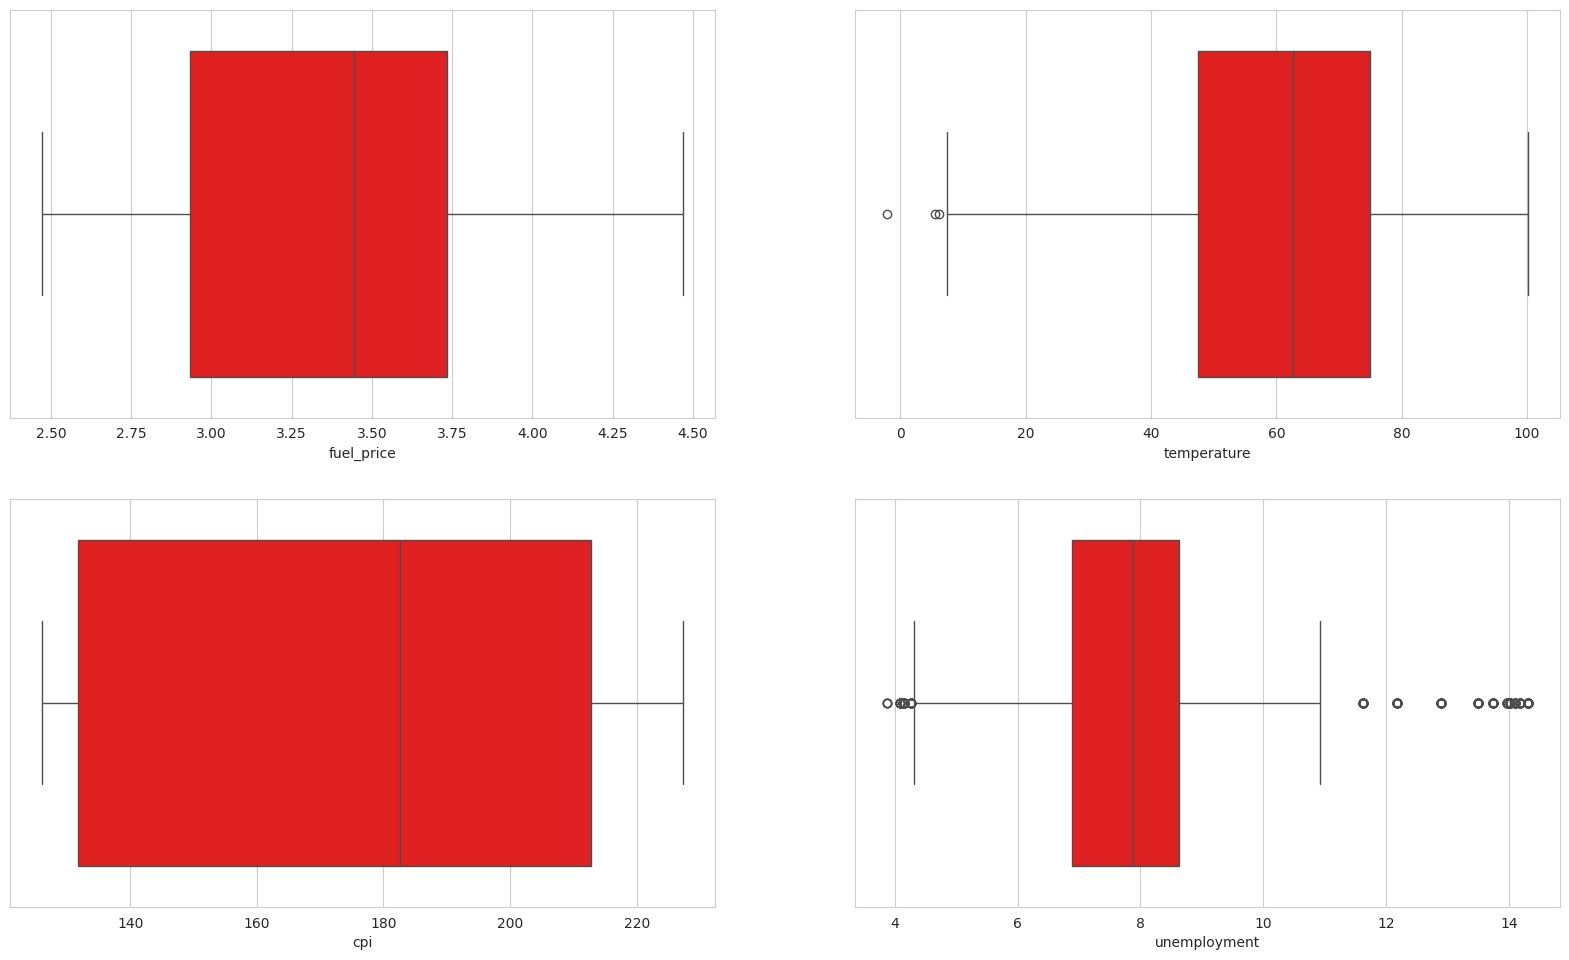

Number of data rows:  6435


In [365]:
cols = ['fuel_price', 'temperature', 'cpi', 'unemployment']
plt.figure(figsize=(20,18))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_new, x = col, color = 'red')
plt.show()

print('Number of data rows: ', data_new.shape[0])

In [366]:
# Remove outliers from the temperature column
data_new.drop(data_new[data_new['temperature'] < 7].index, axis = 0, inplace = True)

In [367]:
# Remove outliers from the unemployment column
data_new.drop(data_new[data_new['unemployment'] < 4.4].index, axis = 0, inplace = True)
data_new.drop(data_new[data_new['unemployment'] > 11].index, axis = 0, inplace = True)

0 temperature
1 fuel_price
2 cpi
3 unemployment


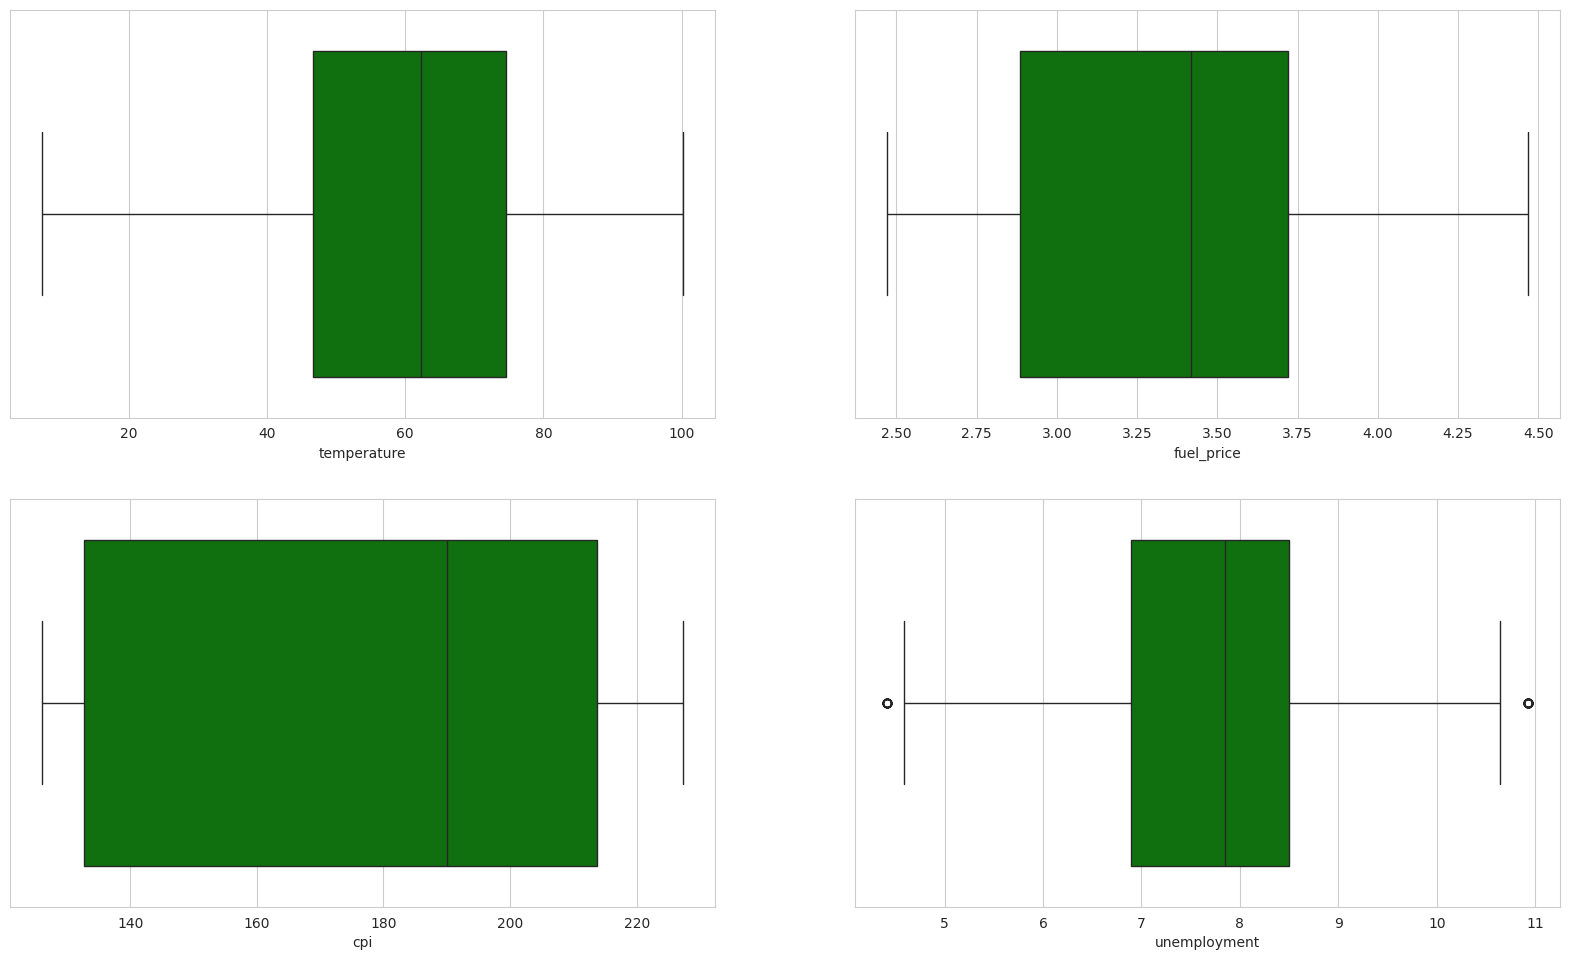

Number of data rows:  5938


In [368]:
cols = ['temperature', 'fuel_price', 'cpi', 'unemployment']
plt.figure(figsize=(20,18))
for i, col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_new, x = col, color = 'g')
plt.show()

print('Number of data rows: ', data_new.shape[0])

In [369]:
# saving cleaned data into a CSV file using pandas
data_new.to_csv('cleaned_walmart.csv', index=False)

# Train And Test

## Splitting The Data To Training And Testing Data

In [370]:
X = data_new.drop('weekly_sales', axis = 1)
y = data_new['weekly_sales']

In [371]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [372]:
print('Shape of data      : ', X.shape)
print('Shape of train data: ', X_train.shape)
print('Shape of test data : ', X_test.shape)

Shape of data      :  (5938, 9)
Shape of train data:  (4750, 9)
Shape of test data :  (1188, 9)


## Data Transformation

In [373]:
data_new.head()

store  weekly_sales holiday_flag  temperature  fuel_price    cpi  \
0     1    1643690.90            0        42.31        2.57 211.10   
1     1    1641957.44            1        38.51        2.55 211.24   
2     1    1611968.17            0        39.93        2.51 211.29   
3     1    1409727.59            0        46.63        2.56 211.32   
4     1    1554806.68            0        46.50        2.62 211.35   

   unemployment  season month_name week  
0          8.11  Winter   February    5  
1          8.11  Winter   February    6  
2          8.11  Winter   February    7  
3          8.11  Winter   February    8  
4          8.11  Winter      March    9

In [374]:
# Splitting the data into Numerical Features and Categorical Features
num_features = data_new.select_dtypes('number').columns.to_list()
num_features.remove('weekly_sales')

cat_features = data_new.select_dtypes('object').columns.to_list()

print(f'Numerical Features : {num_features}')
print(f'Categorical Features: {cat_features}')

Numerical Features : ['temperature', 'fuel_price', 'cpi', 'unemployment']
Categorical Features: ['store', 'holiday_flag', 'season', 'month_name', 'week']


In [375]:
!pip install --upgrade category_encoders

In [376]:
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
# data transformation pipeline
preprocessor = ColumnTransformer([
                                  ('num_features', StandardScaler(), num_features),
                                  ('cat_features', BinaryEncoder(), cat_features),
                                ])

# Fitting the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 ['temperature', 'fuel_price', 'cpi',
                                  'unemployment']),
                                ('cat_features', BinaryEncoder(),
                                 ['store', 'holiday_flag', 'season',
                                  'month_name', 'week'])])

In [377]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

## Model Evaluated
1. A machine learning (ML) model is an algorithm trained on a data set to perform a certain predicted task. Model evaluation seeks to define how well the model fulfills its task. Model evaluation is the procedure that employs some measures that assist us in examining the performance of the model. The evaluation also helps to analyze a model’s primary shortcomings. There are several measures including Accuracy, Precision, Recall, F1 score, Area under Curve, Confusion Matrix, and Mean Square Error. Cross Validation is one strategy that is done during the training phase and it is a model evaluation technique as well. Cross-validation is a strategy in which we do not use the complete dataset for training. In this strategy, some part of the dataset is retained for testing the model. There are several types of Cross-Validation out of which K-fold cross-validation is frequently employed.

**R2** = R-Squared, also known as the coefficient of determination, is another statistical metric used to evaluate the performance of regression models. It measures the proportion of the total variation in the dependent variable (output) that can be explained by the independent variables (inputs) in the model.R-squared value is used to measure the goodness of fit or best-fit line. The greater the value of R-Squared, the better is the regression model as most of the variation of actual values from the mean value get explained by the regression model.The purpose of using R-squared is to assess the model’s explanatory power and determine how well the model fits the data. Some key reasons for using R-squared are:

* Model interpretability
* Model comparability
* Model selection

  Based on correlation between actual and predicted value. Value lies between 0 and 1 Not sensitive to outliers Value near 1 indicates better model

**Mean_squared_error** = Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals. Based on square of error Value lies between 0 to ∞ Sensitive to outliers, punishes larger error more Small value indicates better model

MSE is used to check how close estimates or forecasts are to actual values. Lower the MSE, the closer is forecast to actual. This is used as a model evaluation measure for regression models and the lower value indicates a better fit.R-squared has some limitations. It can be misleading in cases where the model is too complex or when there is a high degree of multicollinearity among the independent variables. Additionally, a high R-squared value does not necessarily mean the model is accurate in its predictions or suitable for all purposes. In these cases, other performance metrics, such as Mean Squared Error (MSE) or adjusted R-squared, may be more appropriate for evaluating model performance.

## R-Squared can also be expressed as a function of mean squared error (MSE).

Conclutioin:

* MSE represents the residual error which is nothing but sum of squared difference between actual values and the predicted / estimated values divided by total number of records.
* R-Squared represents the fraction of variance captured by the regression model.
* The disadvantage of using MSE is that the value of MSE varies based on whether the values of response variable is scaled or not. If scaled, MSE will be lower than the unscaled values.

In [378]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def model_evaluation(estimator, Training_Testing, X, y):

    ##This function is used to evaluate the model through RMSE and R2

    # Y predict of X train or X test
    predict_data = estimator.predict(X)

    print(f'{Training_Testing} Accuracy: \n')
    print(f'-> Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y, predict_data)), 2)}')
    print(f'-> R-Squere score Training: {round(r2_score(y, predict_data) * 100, 2)} % \n')

In [379]:
def Distribution_Plot(estimator, Training_Testing, X, y, Title):

    """This function is used to perform some model evaluation using training and testing data \
    by plotting the distribution of the actual and predicted values of the training or testing data."""

    # Y predict of X train or X test
    yhat = estimator.predict(X)

    plt.figure(figsize=(14, 6))
    ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
    ax2 = sns.distplot(yhat, hist = False, color = "r", label = f'Predicted Values ({Training_Testing})', ax = ax1)
    plt.title(Title, size = 18)
    plt.legend()
    plt.show()

* Cross_Validation: Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds.
* The main purpose of cross validation is to prevent overfitting.

**Hyperparameter_Tuning:** Hyperparameters are defined as the parameters that are explicitly defined by the user to control the learning process. hyperparameter tuning algorithms exist, although the most commonly used types are Bayesian optimization, grid search and randomized search. The k in kNN or K-Nearest Neighbour algorithm.

* Grid search
* With grid search, you specify a list of hyperparameters and a performance metric, and the algorithm works through all possible combinations to determine the best fit. Grid search works well, but it’s relatively tedious and computationally intensive, especially with large numbers of hyperparameters.

**Here are some examples of common hyperparameters**

* Learning rate for training a neural network
* Train-test split ratio
* Batch Size
* Number of Epochs
* Branches in Decision Tree
* Number of clusters in Clustering Algorithm

In [380]:
from sklearn.model_selection import cross_val_score
def cross_validation_score(estimator, X_train, y_train, score = 'r2', n = 5):

    '''This function is to validate the model'''


    validate = cross_val_score(estimator, X_train, y_train, scoring = score, cv = n)

    print(f'Cross Validation Scores: {validate} \n')
    print(f'Mean of Scores: {round(validate.mean() * 100, 2)} % \n')
    print(f'Standard Deviation of Scores: {validate.std()}')

In [381]:
def hyperparameter_tunning(estimator, X_train, y_train, param_grid, score = 'r2', n = 5):

    '''This function is used to find the best set of hyperparameters for the model to optimize its performance'''


    # Perform grid search
    grid_search = GridSearchCV(estimator = estimator,
                               param_grid = param_grid,
                               scoring = score,
                               cv = n)

    # Fit the data
    grid_search.fit(X_train,y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')

    # best estimator
    best_estimator = grid_search.best_estimator_

    return best_estimator

## Linear Regression Model

In [382]:
from sklearn.linear_model import LinearRegression

Linear_model = LinearRegression()

# Fitting the data
Linear_model.fit(X_train_transformed, y_train)

LinearRegression()

## Evaluation The LinearRegression Model(Traing Data_set)

In [383]:
# Training Accuracy
model_evaluation(Linear_model, 'Traing',X_train_transformed, y_train)

Traing Accuracy: 

-> Root Mean Squared Error: 522051.03
-> R-Squere score Training: 16.11 % 



## Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

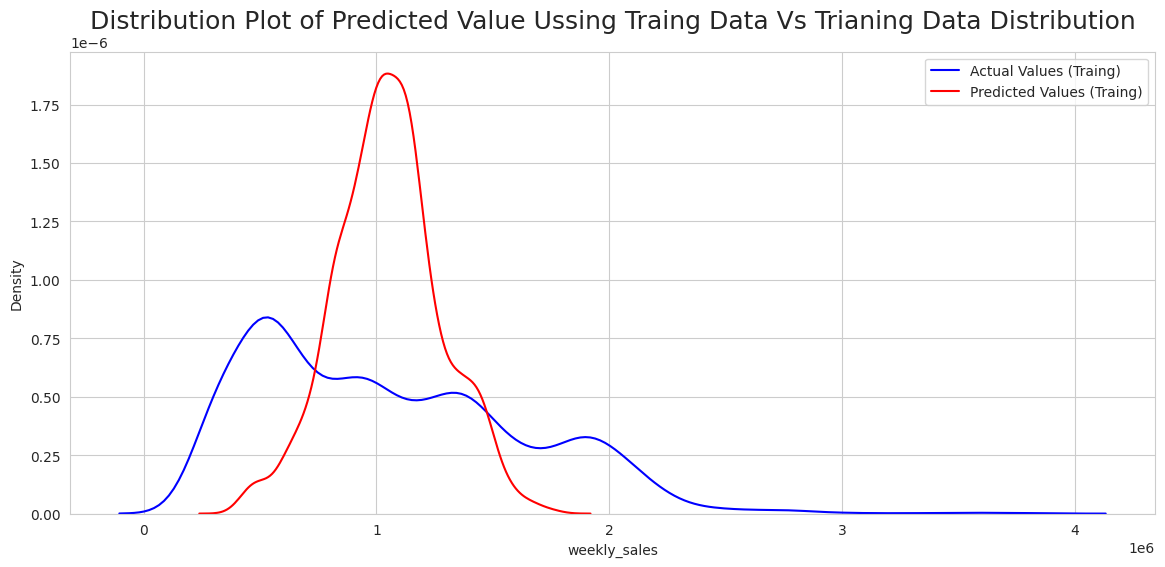

In [384]:
Title = 'Distribution Plot of Predicted Value Ussing Traing Data Vs Trianing Data Distribution'
Distribution_Plot(Linear_model, 'Traing',X_train_transformed, y_train, Title)

* Conclution : There are no linear correlations Between variable and target,The model seems to be not doing well learning from thr training dataset,so we need to increase the cmplexity of this model.let's Polynomial Features for the data before mode

## Tuning The Model with Polynomial Regression Model

In [385]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

Linear_pipe = Pipeline([('poly_feat', PolynomialFeatures()),
                           ('lin_reg',LinearRegression())])

## Define the parameter grid to search
param_grid = {'poly_feat__degree':[2, 3, 4]}

# Assuming Linear_pipe, X_train_transformed, and y_train are defined
best_estimator = hyperparameter_tunning(Linear_pipe, X_train_transformed, y_train, param_grid, score='r2', n=5)

Best parameters: {'poly_feat__degree': 3} 

Best score: 0.961587247259336


In [386]:
## Linear Regression Model After Tunning
poly_reg = best_estimator

## Evaluation The Model After Tuning

In [387]:
model_evaluation(poly_reg, 'Traing',X_train_transformed, y_train)

Traing Accuracy: 

-> Root Mean Squared Error: 67122.63
-> R-Squere score Training: 98.61 % 



## Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.

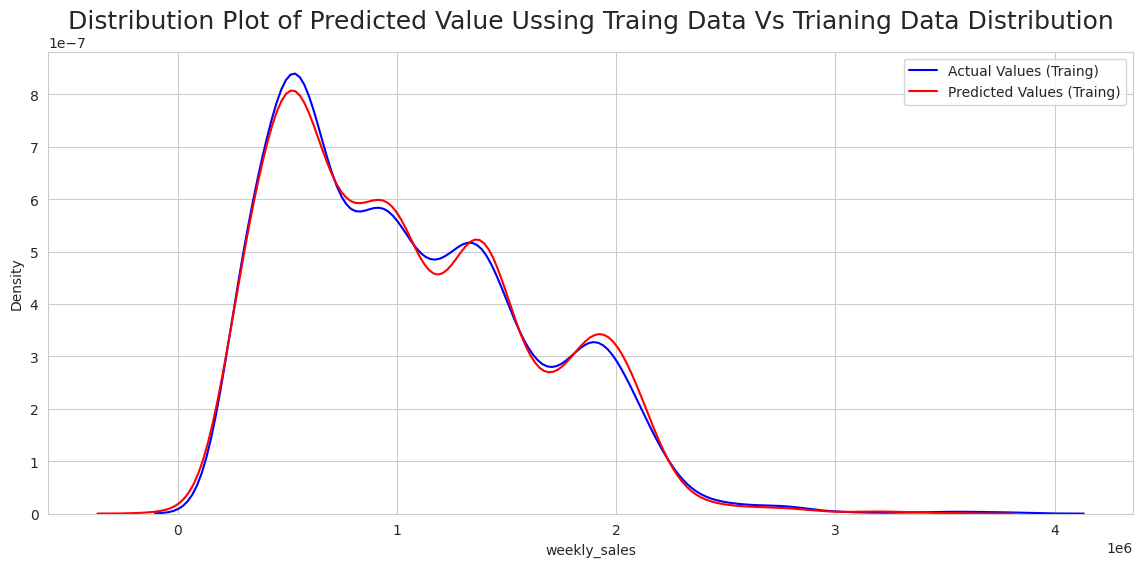

In [388]:
Title = 'Distribution Plot of Predicted Value Ussing Traing Data Vs Trianing Data Distribution'
Distribution_Plot(poly_reg, 'Traing',X_train_transformed, y_train, Title)

* Conclusion: After applying Polynomial Features to the training data, The model seems to have improved more in learning from the training dataset.

**Cross** Validation Score

In [389]:
cross_validation_score(poly_reg,X_train_transformed, y_train)

Cross Validation Scores: [0.9601431  0.96254509 0.95954481 0.96750533 0.95819791] 

Mean of Scores: 96.16 % 

Standard Deviation of Scores: 0.003276761961364399


## Testing The Model

In [390]:
model_evaluation(poly_reg,'Testing',X_test_transformed, y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 101730.35
-> R-Squere score Training: 96.84 % 



## Figure 3: Plot of predicted value using the test data compared to the actual values of the test data

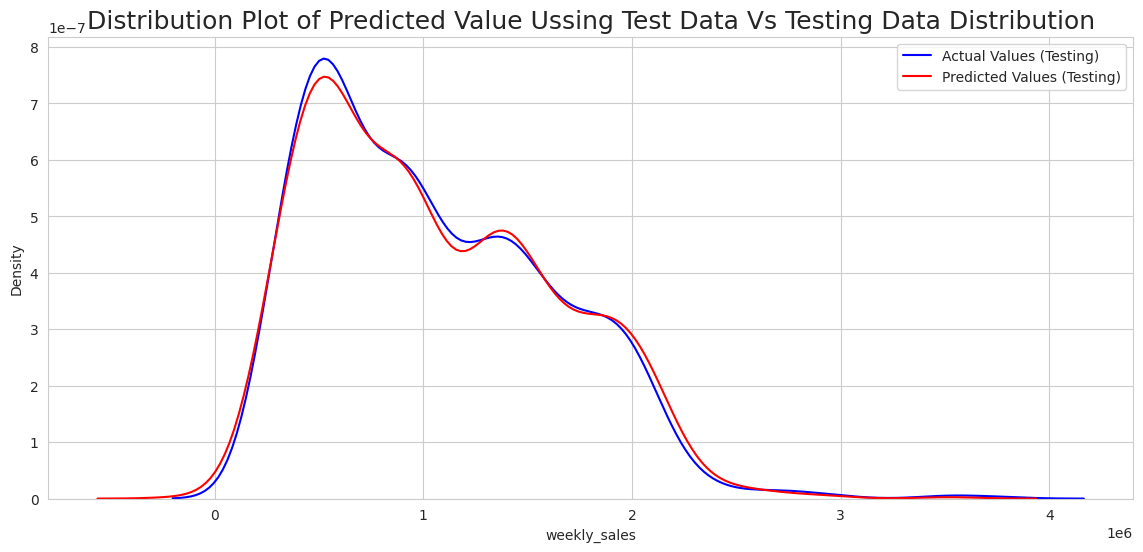

In [391]:
Title = 'Distribution Plot of Predicted Value Ussing Test Data Vs Testing Data Distribution'
Distribution_Plot(poly_reg, 'Testing',X_test_transformed, y_test, Title)

**Conclusion:**

* After testing the polynomial regression model, it became clear that the model had learned sufficiently, as its accuracy was 96.84 %

## KNN modeling

In [392]:
from sklearn.neighbors import KNeighborsRegressor
# KNN Regression Model
KNN_Reg = KNeighborsRegressor(n_neighbors = 5)

# Fitting the training data
KNN_Reg.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [393]:
# Training Accuracy
model_evaluation(KNN_Reg, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 358918.31
-> R-Squere score Training: 60.35 % 



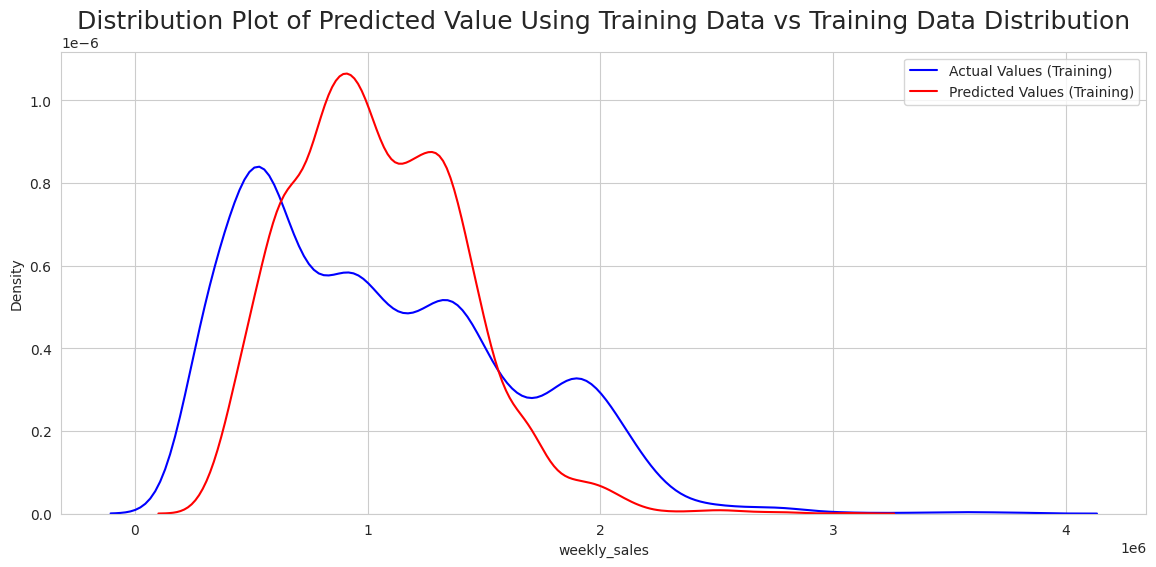

In [394]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(KNN_Reg, 'Training', X_train_transformed, y_train, Title)

**Conclusion:**

* The model seems to be doing not bad in learning from the training dataset.


## Tuning The Model

In [395]:
# Define the parameter grid to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 8, 9, 11, 13]}

best_estimator = hyperparameter_tunning(KNN_Reg, X_train_transformed, y_train, param_grid, score = 'r2', n = 5)

Best_KNN = best_estimator

Best parameters: {'n_neighbors': 13} 

Best score: 0.42320054785291283


In [396]:
# Training Accuracy Afer tuning
model_evaluation(Best_KNN, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 395434.36
-> R-Squere score Training: 51.87 % 



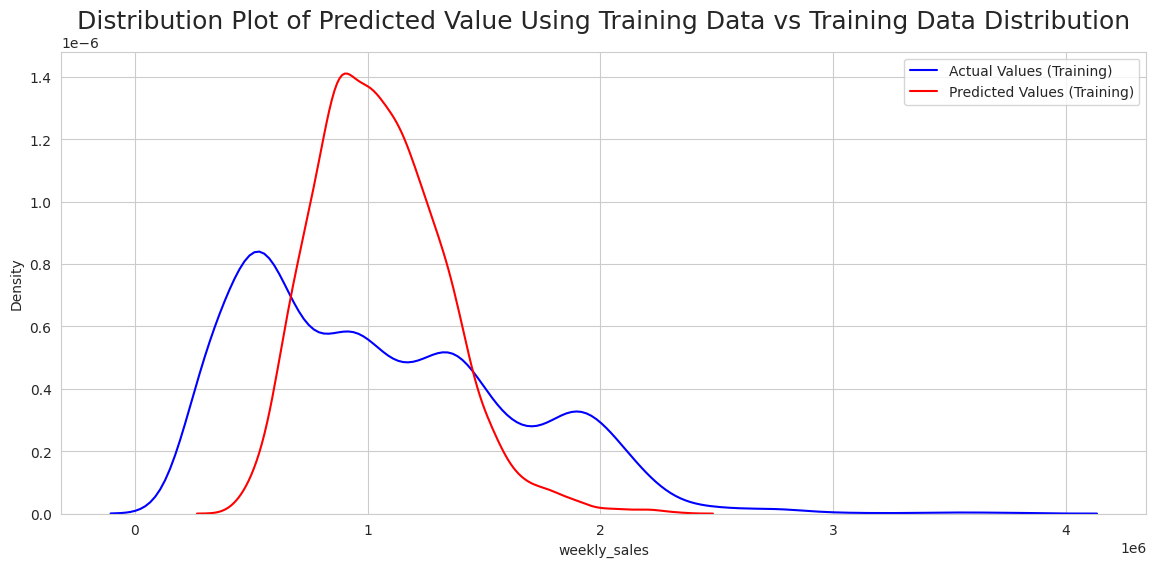

In [397]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Best_KNN, 'Training', X_train_transformed, y_train, Title)

In [398]:
cross_validation_score(Best_KNN, X_train_transformed, y_train, n = 10)

Cross Validation Scores: [0.42269564 0.38167557 0.40153214 0.45908764 0.42543618 0.41456613
 0.41172563 0.433573   0.43025631 0.46477738] 

Mean of Scores: 42.45 % 

Standard Deviation of Scores: 0.023582767692979376


In [399]:
# Testing Accuracy
model_evaluation(Best_KNN, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 422689.74
-> R-Squere score Training: 45.37 % 



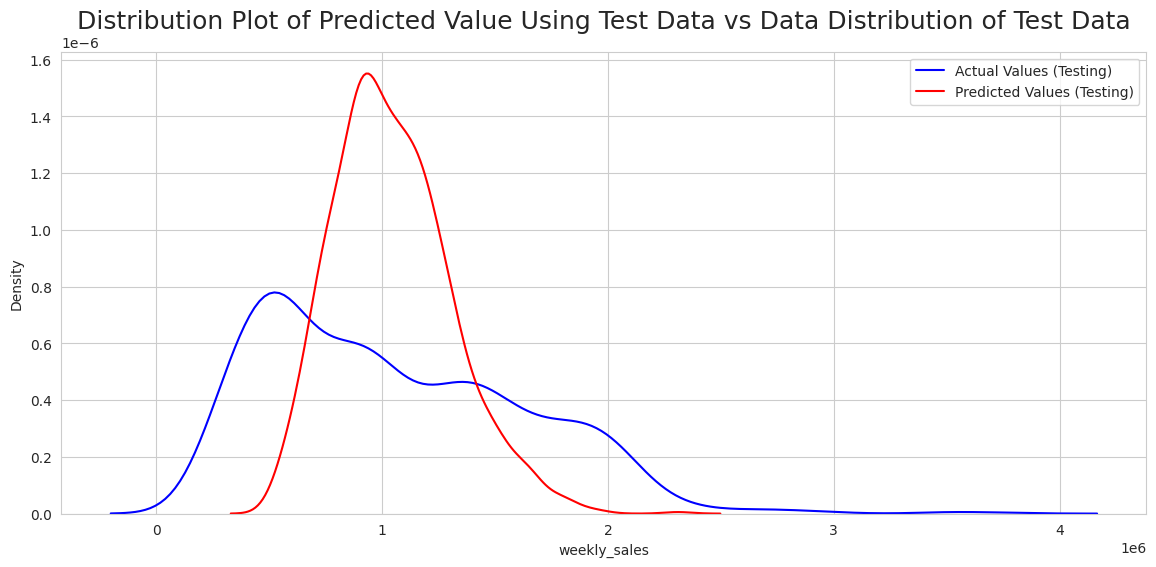

In [400]:
# Figure 3: Plot of predicted value using the test data compared to the actual values of the test data.
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
Distribution_Plot(Best_KNN, 'Testing', X_test_transformed, y_test, Title)